# Exploratory Data Analysis for HDB Resale Prices Dataset

>Note: All exploratory data analysis done in this notebook will be based on the time period: **<font color='#e69798'>2003 to 2012</font>**

In this jupyter notebook, we will attempt to use data visualization tools to explore the relationships between features (both pre-defined by the original dataset and self-defined by us) and the corresponding HDB resale prices in Singapore. This data exploration process is done after Data Cleaning & Feature Engineering.

This is a complete and more detailed exploratory data analysis on the HDB Resale Price Dataset, of which only some features have been selected to be presented in the Final Report due to space constraints and importance of other aspects of the project.

After which, we will compare the trends across the two time periods in the Final Report.

## 1. Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl

import seaborn as sns
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

import random

%matplotlib inline

## 2. Loading HDB Resale Prices Dataset
**hdb_price_df_03_12**: Pandas DataFrame object representing the features and information related to HDB flats in Singapore, for the time period — *2003 to 2012 (10 years)*

**hdb_price_df_13_23**: Pandas DataFrame object representing the features and information related to HDB flats in Singapore, for the time period — *2013 to February 2023 (10 years & 2 months)*

**hdb_price_df**: Pandas DataFrame object will be the combination of both DataFrames — *hdb_price_df_03_12* & *hdb_price_df_13_23*

In [2]:
hdb_price_df_03_12 = pd.read_csv('hdb-price-with-features-2003to2012.csv').iloc[:, 1:]
hdb_price_df_13_23 = pd.read_csv('hdb-price-with-features-2013to2023.csv').iloc[:, 1:]

hdb_price_df_03_12.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,...,mall_count_within_1km,mall_list_within_1km,school_shortest_dist,school_shortest_dist_name,good_sch_count_within_1km,good_sch_list_within_1km,good_sch_score,good_sch_score_sap_gep,distance_to_cbd_km,matured
0,2012-09-01,BISHAN,4 ROOM,289,BISHAN ST 24,07 TO 09,100.0,Premium Apartment,1998,85.0,...,1,['Junction 8'],0.214393,Catholic High School,1,['Catholic High School'],3,2,7.635584,1
1,2012-03-01,BISHAN,4 ROOM,289,BISHAN ST 24,01 TO 05,102.0,Premium Apartment,1998,85.0,...,1,['Junction 8'],0.214393,Catholic High School,1,['Catholic High School'],3,2,7.635584,1
2,2012-03-01,BISHAN,5 ROOM,289,BISHAN ST 24,11 TO 15,121.0,Premium Apartment,1998,85.0,...,1,['Junction 8'],0.214393,Catholic High School,1,['Catholic High School'],3,2,7.635584,1
3,2012-02-01,BISHAN,5 ROOM,289,BISHAN ST 24,07 TO 09,121.0,Premium Apartment,1998,85.0,...,1,['Junction 8'],0.214393,Catholic High School,1,['Catholic High School'],3,2,7.635584,1
4,2011-12-01,BISHAN,4 ROOM,289,BISHAN ST 24,07 TO 09,100.0,Premium Apartment,1998,86.0,...,1,['Junction 8'],0.214393,Catholic High School,1,['Catholic High School'],3,2,7.635584,1


In [3]:
# new 'year' feature - just to check correctness of time frame 
hdb_price_df_03_12['year'] = pd.DatetimeIndex(hdb_price_df_03_12['month']).year
print("Range of Years in \x1B[3mhdb_price_df_03_12\x1B[0m DataFrame:", np.sort(hdb_price_df_03_12['year'].unique()))

hdb_price_df_13_23['year'] = pd.DatetimeIndex(hdb_price_df_13_23['month']).year
print("Range of Years in \x1B[3mhdb_price_df_13_23\x1B[0m DataFrame:", np.sort(hdb_price_df_13_23['year'].unique()))

Range of Years in hdb_price_df_03_12 DataFrame: [2003 2004 2005 2006 2007 2008 2009 2010 2011 2012]
Range of Years in hdb_price_df_13_23 DataFrame: [2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]


## 3. Adjustment of HDB Resale Prices for Inflation (using CPI)
 ***adjusted_price***: indicates the adjusted HDB Resale Price after accounting for inflation

In [4]:
# Read CPI data
cpi = pd.read_csv('monthly cpi.csv')
cpi = cpi.set_index('Data Series')
cpi_data = pd.DataFrame(cpi.columns, columns=['month'])
cpi_data['CPI'] = pd.to_numeric(np.array(cpi.loc['All Items']))
cpi_data = cpi_data.iloc[1: , :]
cpi_data['month'] = pd.to_datetime(cpi_data['month'])

# adjust prices for inflation using CPI
hdb_price_df_03_12['month'] = pd.to_datetime(hdb_price_df_03_12['month'])
hdb_price_df_03_12 = pd.merge(hdb_price_df_03_12, cpi_data, how = 'left')
hdb_price_df_03_12['adjusted_price'] = (hdb_price_df_03_12['resale_price'] / hdb_price_df_03_12['CPI']) * 100

hdb_price_df_13_23['month'] = pd.to_datetime(hdb_price_df_13_23['month'])
hdb_price_df_13_23 = pd.merge(hdb_price_df_13_23, cpi_data, how = 'left')
hdb_price_df_13_23['adjusted_price'] = (hdb_price_df_13_23['resale_price'] / hdb_price_df_13_23['CPI']) * 100

hdb_price_df_03_12.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,...,school_shortest_dist_name,good_sch_count_within_1km,good_sch_list_within_1km,good_sch_score,good_sch_score_sap_gep,distance_to_cbd_km,matured,year,CPI,adjusted_price
0,2012-09-01,BISHAN,4 ROOM,289,BISHAN ST 24,07 TO 09,100.0,Premium Apartment,1998,85.0,...,Catholic High School,1,['Catholic High School'],3,2,7.635584,1,2012,97.298,657773.027195
1,2012-03-01,BISHAN,4 ROOM,289,BISHAN ST 24,01 TO 05,102.0,Premium Apartment,1998,85.0,...,Catholic High School,1,['Catholic High School'],3,2,7.635584,1,2012,95.207,630205.762181
2,2012-03-01,BISHAN,5 ROOM,289,BISHAN ST 24,11 TO 15,121.0,Premium Apartment,1998,85.0,...,Catholic High School,1,['Catholic High School'],3,2,7.635584,1,2012,95.207,766750.343987
3,2012-02-01,BISHAN,5 ROOM,289,BISHAN ST 24,07 TO 09,121.0,Premium Apartment,1998,85.0,...,Catholic High School,1,['Catholic High School'],3,2,7.635584,1,2012,94.491,756685.821930
4,2011-12-01,BISHAN,4 ROOM,289,BISHAN ST 24,07 TO 09,100.0,Premium Apartment,1998,86.0,...,Catholic High School,1,['Catholic High School'],3,2,7.635584,1,2011,93.877,637003.738935


In [5]:
# also for the full dataset
hdb_price_df = pd.concat([hdb_price_df_03_12, hdb_price_df_13_23], axis=0)
print(hdb_price_df_03_12['month'].nunique() + hdb_price_df_13_23['month'].nunique() == hdb_price_df['month'].nunique())

True


In [6]:
hdb_price_df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,...,school_shortest_dist_name,good_sch_count_within_1km,good_sch_list_within_1km,good_sch_score,good_sch_score_sap_gep,distance_to_cbd_km,matured,year,CPI,adjusted_price
0,2012-09-01,BISHAN,4 ROOM,289,BISHAN ST 24,07 TO 09,100.0,Premium Apartment,1998,85.0,...,Catholic High School,1,['Catholic High School'],3,2,7.635584,1,2012,97.298,657773.027195
1,2012-03-01,BISHAN,4 ROOM,289,BISHAN ST 24,01 TO 05,102.0,Premium Apartment,1998,85.0,...,Catholic High School,1,['Catholic High School'],3,2,7.635584,1,2012,95.207,630205.762181
2,2012-03-01,BISHAN,5 ROOM,289,BISHAN ST 24,11 TO 15,121.0,Premium Apartment,1998,85.0,...,Catholic High School,1,['Catholic High School'],3,2,7.635584,1,2012,95.207,766750.343987
3,2012-02-01,BISHAN,5 ROOM,289,BISHAN ST 24,07 TO 09,121.0,Premium Apartment,1998,85.0,...,Catholic High School,1,['Catholic High School'],3,2,7.635584,1,2012,94.491,756685.821930
4,2011-12-01,BISHAN,4 ROOM,289,BISHAN ST 24,07 TO 09,100.0,Premium Apartment,1998,86.0,...,Catholic High School,1,['Catholic High School'],3,2,7.635584,1,2011,93.877,637003.738935


In [7]:
# sanity check of adjusted prices
random_index = random.randint(0, len(hdb_price_df)+1)
print((hdb_price_df.iloc[random_index]['adjusted_price'] in hdb_price_df_03_12['adjusted_price'].to_list()) or 
      (hdb_price_df.iloc[random_index]['adjusted_price'] in hdb_price_df_13_23['adjusted_price'].to_list()))

True


In [8]:
hdb_price_df_03_12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278875 entries, 0 to 278874
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   month                      278875 non-null  datetime64[ns]
 1   town                       278875 non-null  object        
 2   flat_type                  278875 non-null  object        
 3   block                      278875 non-null  object        
 4   street_name                278875 non-null  object        
 5   storey_range               278875 non-null  object        
 6   floor_area_sqm             278875 non-null  float64       
 7   flat_model                 278875 non-null  object        
 8   lease_commence_date        278875 non-null  int64         
 9   remaining_lease            278875 non-null  float64       
 10  resale_price               278875 non-null  float64       
 11  address                    278875 non-null  object  

In [9]:
# column names
hdb_price_df_03_12.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price', 'address', 'latitude', 'longitude',
       'shortest_dist_mrt_name', 'shortest_dist_mrt', 'mrt_count_within_1km',
       'mrt_list_within_1km', 'shortest_dist_mall_name', 'shortest_dist_mall',
       'mall_count_within_1km', 'mall_list_within_1km', 'school_shortest_dist',
       'school_shortest_dist_name', 'good_sch_count_within_1km',
       'good_sch_list_within_1km', 'good_sch_score', 'good_sch_score_sap_gep',
       'distance_to_cbd_km', 'matured', 'year', 'CPI', 'adjusted_price'],
      dtype='object')

## 4. Exploring the Relationship between <font color='#448c79'> Physical Characteristics of a Flat </font> and HDB Resale Prices

The table below summarizes the ***physical features*** of a flat that we will be conducting EDA with —
| No.      | Feature Name | Values    |
| :---|    :----:   |          :---: |
| 1   | *`flat_type`*       | 1 Room, 2 Room, ... , Executive, Multi-Generation|
| 2   | *`year`*        | 2003, 2004, ... , 2012      |
| 3   | *`town`*      | Bukit Timah, Woodlands, Dhoby Ghaut, ...   |
| 4   | *`storey_range`*        | 01 to 03, 03 to 05, ... , 40 to 42|
| 5   | *`floor_area_sqm`*        | |
| 6   | *`blocknum`*        | |
| 7   | *`flat_model`*        | Simplified, New Generation, ..., Terrace, Premium Maisonette |
| 8   | *`lease_commence_date`*        | 1966, 1967, ..., 2010, 2012|
| 9   | *`remaining_lease`*        | |

### 4.1 Flat Type
#### Distribution of Flat Types

In [10]:
print('Unique Flat Types from 2003 to 2012:\n',hdb_price_df_03_12['flat_type'].unique())

Unique Flat Types from 2003 to 2012:
 ['4 ROOM' '5 ROOM' '3 ROOM' 'EXECUTIVE' '2 ROOM' '1 ROOM'
 'MULTI-GENERATION']


In [11]:
flat_count_04_13 = hdb_price_df_03_12.groupby(['flat_type']).size().reset_index()
flat_count_04_13.rename(columns={0: 'count'}, inplace=True)
flat_count_04_13['flat_type_proportion'] = (flat_count_04_13['count']/flat_count_04_13['count'].sum())*100
flat_count_04_13['flat_type_proportion'] = flat_count_04_13['flat_type_proportion'].round(1)
flat_count_04_13

,flat_type,count,flat_type_proportion
0,1 ROOM,205,0.1
1,2 ROOM,2818,1.0
2,3 ROOM,83878,30.1
3,4 ROOM,106622,38.2
4,5 ROOM,64450,23.1
5,EXECUTIVE,20781,7.5
6,MULTI-GENERATION,121,0.0


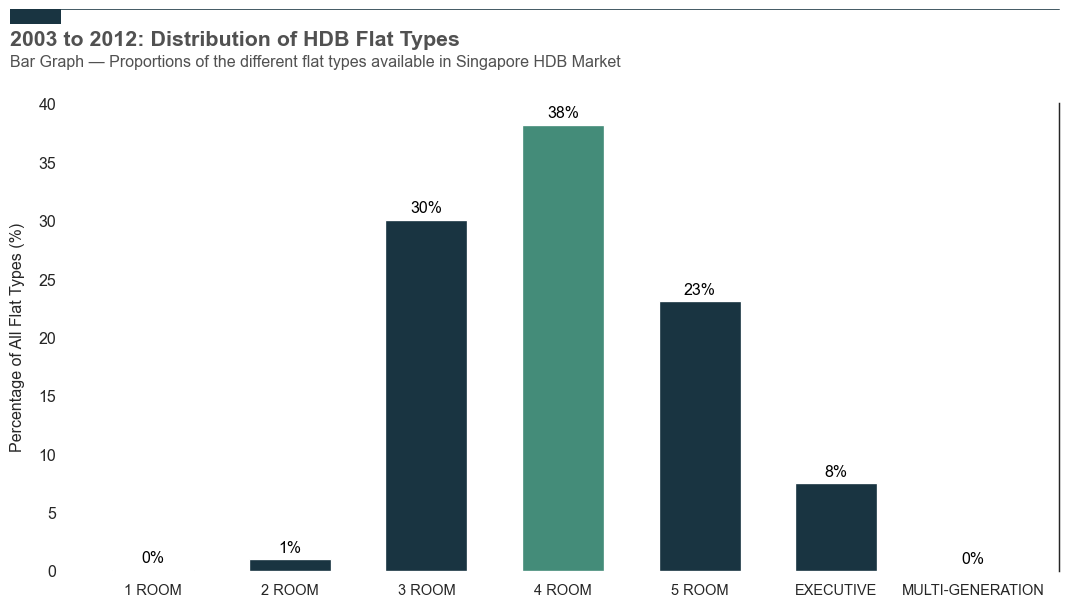

In [12]:
fig, ax = plt.subplots(figsize=(13.33, 7.5), dpi=96)

# Grid
# ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
#ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Set colors for bar graph
flat_type_proportion_highest = flat_count_04_13['flat_type_proportion'].max()
colors=['#193441']*len(flat_count_04_13)
for index, row in flat_count_04_13.iterrows():
    if row['flat_type_proportion'] == flat_type_proportion_highest:
        colors[index] = '#448c79'
    else:
        colors[index] = '#193441'

# Plot bars
bar1 = ax.bar(flat_count_04_13['flat_type'], flat_count_04_13['flat_type_proportion'], width=0.6, color=colors)

# Label x-axis and x ticks
ax.set_xlabel('', fontsize=12, labelpad=10) # No need for an axis label
ax.xaxis.set_label_position("bottom")

# Reformat y-axis
ax.set_ylabel('Percentage of All Flat Types (%)', fontsize=12, labelpad=10)
ax.yaxis.set_label_position("left")
ax.yaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=12)

# Add label on top of each bar
ax.bar_label(bar1, labels=[f'{e:,.0f}%' for e in flat_count_04_13['flat_type_proportion']], padding=3, color='black', fontsize=12) 

# Remove  spines
ax.spines[['top','left','bottom']].set_visible(False)

# Make right spine thicker
ax.spines['right'].set_linewidth(1.1)

# Add rectangle box and line (beautification purposes only)
ax.plot([0.08, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#193441', linewidth=.6)
ax.add_patch(plt.Rectangle((0.08,.98), 0.04, -0.02, facecolor='#193441', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.08, y=.93, s="2003 to 2012: Distribution of HDB Flat Types", transform=fig.transFigure, ha='left', fontsize=16, weight='bold', alpha=.8)
ax.text(x=0.08, y=.90, s="Bar Graph — Proportions of the different flat types available in Singapore HDB Market", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.85, wspace=None, hspace=None)

# Set a white background
fig.patch.set_facecolor('white')

**Observations:**

For the time period 2003 to 2012, 4 Room Flats take up the majority of flats in Singapore HDB market, accounting to almost 40% of all flat types. Followed by 3 Room, 5 Room and then Executive Flat Types. 

There are proportionately very few 1 room, 2 rooms and multi-generation flat types. As such, we will remove the following flat types for subsequent visualizations:
- 1 Room
- 2 Room
- Multi-Generation

<font color='#ffab40'> 

**Comparing across both 10-year periods:**

4 Room flats have increased in its proportion from 38% to 41% across, from time period 2003 to 2012 to time period 2013 to 2023. In the recent decade (i.e. 2013 to 2023), there is a more even proportion between 3 and 5 Room flats compared to the previous decade (i.e. 2003 to 2012). Executive Flat Types remains at a constant proportion of 8% of all Flat Types. 1 Room, 2 Room and Multi-Generation Flat Types remains almost negligble in terms of proportion across both decades.
</font>

In [13]:
print('Unique flat types before removing:', hdb_price_df_03_12['flat_type'].unique(),'\n')
keep_flat_type = ['3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE']
hdb_price_df_03_12 = hdb_price_df_03_12[hdb_price_df_03_12['flat_type'].isin(keep_flat_type)]
print('Unique flat types after removing 1 rooms, 2 rooms and multi-generation flat types:',hdb_price_df_03_12['flat_type'].unique())

# do the same for 2013 to 2023
hdb_price_df_13_23 = hdb_price_df_13_23[hdb_price_df_13_23['flat_type'].isin(keep_flat_type)]

hdb_price_df = hdb_price_df[hdb_price_df['flat_type'].isin(keep_flat_type)]


Unique flat types before removing: ['4 ROOM' '5 ROOM' '3 ROOM' 'EXECUTIVE' '2 ROOM' '1 ROOM'
 'MULTI-GENERATION'] 

Unique flat types after removing 1 rooms, 2 rooms and multi-generation flat types: ['4 ROOM' '5 ROOM' '3 ROOM' 'EXECUTIVE']


#### Distribution of Resale Prices of Flat Types by Year

In [14]:
# create new feature flat_type_year
def get_year(x):
    return str(x)[:4]

hdb_price_df_03_12['flat_type_year'] = hdb_price_df_03_12['flat_type'] + ' - ' + hdb_price_df_03_12['month'].apply(lambda x: str(x)[:4])
hdb_price_df_03_12.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,...,good_sch_count_within_1km,good_sch_list_within_1km,good_sch_score,good_sch_score_sap_gep,distance_to_cbd_km,matured,year,CPI,adjusted_price,flat_type_year
0,2012-09-01,BISHAN,4 ROOM,289,BISHAN ST 24,07 TO 09,100.0,Premium Apartment,1998,85.0,...,1,['Catholic High School'],3,2,7.635584,1,2012,97.298,657773.027195,4 ROOM - 2012
1,2012-03-01,BISHAN,4 ROOM,289,BISHAN ST 24,01 TO 05,102.0,Premium Apartment,1998,85.0,...,1,['Catholic High School'],3,2,7.635584,1,2012,95.207,630205.762181,4 ROOM - 2012
2,2012-03-01,BISHAN,5 ROOM,289,BISHAN ST 24,11 TO 15,121.0,Premium Apartment,1998,85.0,...,1,['Catholic High School'],3,2,7.635584,1,2012,95.207,766750.343987,5 ROOM - 2012
3,2012-02-01,BISHAN,5 ROOM,289,BISHAN ST 24,07 TO 09,121.0,Premium Apartment,1998,85.0,...,1,['Catholic High School'],3,2,7.635584,1,2012,94.491,756685.821930,5 ROOM - 2012
4,2011-12-01,BISHAN,4 ROOM,289,BISHAN ST 24,07 TO 09,100.0,Premium Apartment,1998,86.0,...,1,['Catholic High School'],3,2,7.635584,1,2011,93.877,637003.738935,4 ROOM - 2011


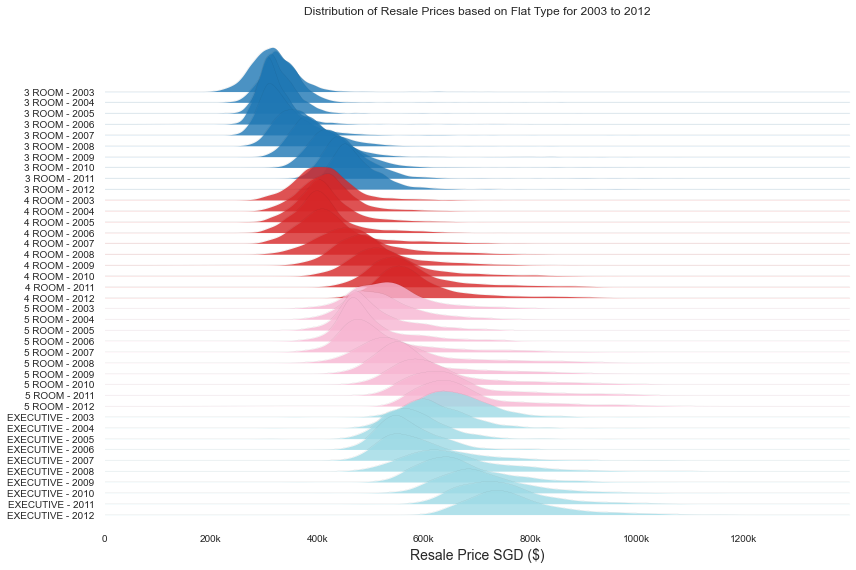

In [180]:
# visualize using joypy library
import joypy

# time block: 2004 to 2013
fig, ax = joypy.joyplot(hdb_price_df_03_12,
                            by='flat_type_year',
                            column='adjusted_price',
                            figsize=(12,8),
                            title='Distribution of Resale Prices based on Flat Type for 2003 to 2012',
                            linewidth=0.05,
                            overlap=1.5,
                            alpha=0.8,
                            colormap=plt.cm.get_cmap('tab20',4))

ax[-1].set_xlim([0, 1400000])
ax[-1].set_xticklabels(['0', '200k', '400k', '600k', '800k', '1000k', '1200k']) 
plt.xlabel('Resale Price SGD ($)', fontsize=14)

plt.show()

**Observations from the above Ridgeline Plot:**

1. Consistent pattern throughout the years that HDB flats with more rooms tend to fetch higher resale prices, which is unsurprising.

2. Looking at how prices vary for the same number of rooms (i.e. same flat type), HDB resale prices generally increase over the years for the same flat type from 2003 to 2012.


### 4.2 Town
#### 2003 to 2012

In [16]:
hdb_price_df_03_12['year'] = pd.DatetimeIndex(hdb_price_df_03_12['month']).year # extract out year
town_prices_03_12 = hdb_price_df_03_12.groupby(['town'], as_index=False).agg({'adjusted_price': 'median'}).sort_values('adjusted_price', ascending=True).reset_index(drop=True)
town_prices_03_12['adjusted_price'] = round(town_prices_03_12['adjusted_price']/1000) # convert prices in terms of SGD1000 for easier visualization since prices are all in '000s
town_prices_03_12

,town,adjusted_price
0,YISHUN,288.0
1,GEYLANG,302.0
2,ANG MO KIO,307.0
3,BEDOK,314.0
4,BUKIT BATOK,320.0
5,QUEENSTOWN,320.0
6,CLEMENTI,325.0
7,TOA PAYOH,335.0
8,JURONG EAST,339.0
9,JURONG WEST,342.0


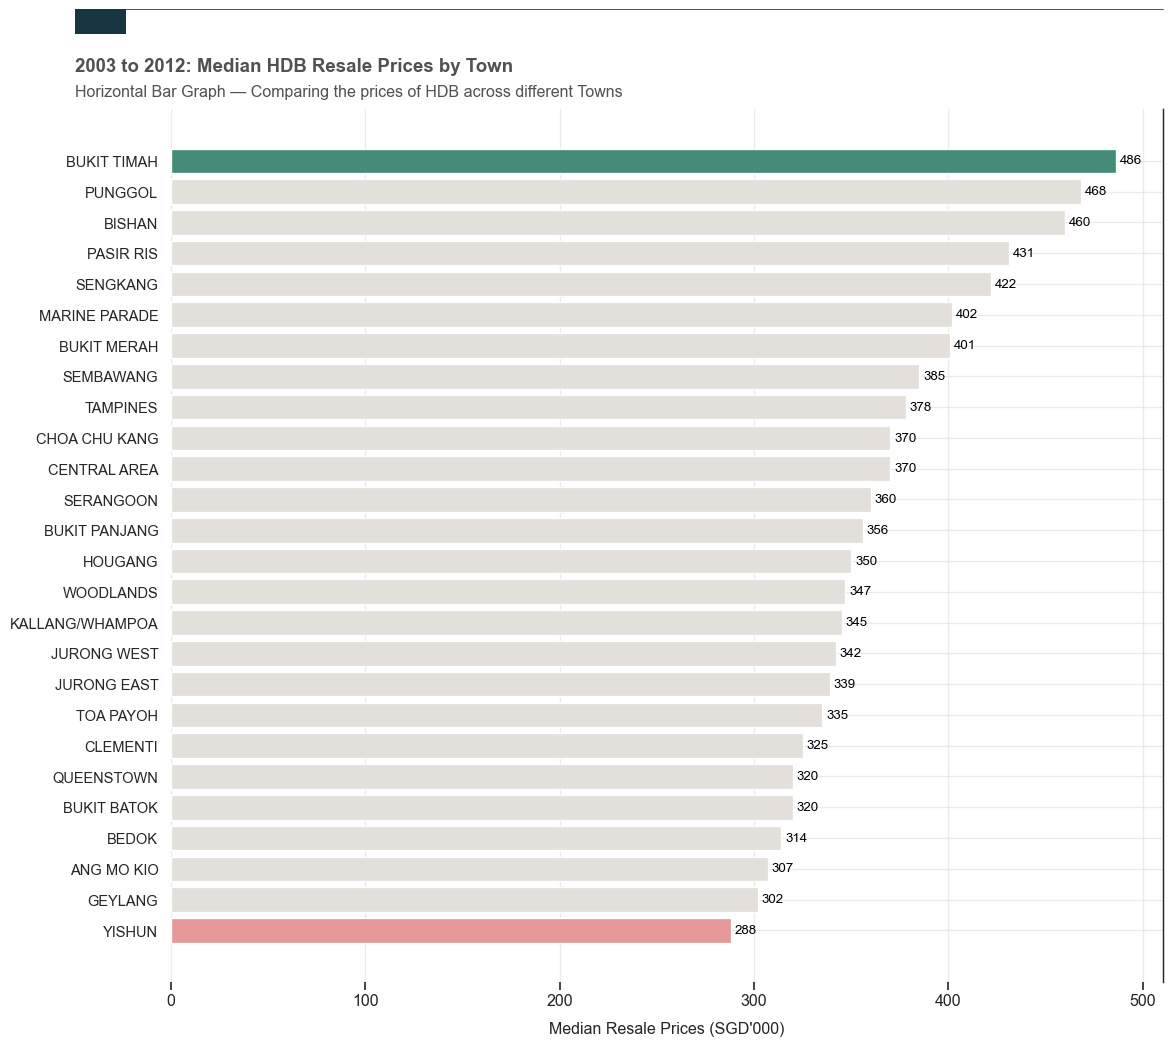

In [17]:
fig, ax = plt.subplots(figsize=(13.33, 13), dpi=96)

lowest_median_price, highest_median_price = town_prices_03_12['adjusted_price'].min(), town_prices_03_12['adjusted_price'].max()
colors=['#e3dfda']*len(town_prices_03_12)
# set to lowest and highest prices to red and green respectively
for index, row in town_prices_03_12.iterrows():
    if row['adjusted_price'] == lowest_median_price:
        colors[index] = '#e69798'
    if row['adjusted_price'] == highest_median_price:
        colors[index] = '#448c79'

# Grid
ax.grid(which="major", axis='x', alpha = 0.5,color='#DAD8D7', zorder=1)
ax.grid(which="major", axis='y', alpha=0.5, color='#DAD8D7', zorder=1)

# Plot bars
bar1=ax.barh(town_prices_03_12['town'], town_prices_03_12['adjusted_price'], color=colors)

# Label x-axis and x ticks
ax.set_xlabel("Median Resale Prices (SGD'000)", fontsize=12, labelpad=10) 
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)

# Add label on top of each bar
ax.bar_label(bar1, labels=[f'{e:,.0f}' for e in town_prices_03_12['adjusted_price']], padding=3, color='black', fontsize=10) 

# Remove spines and make right spine thicker
ax.spines[['top','left','bottom']].set_visible(False)
ax.spines['right'].set_linewidth(1.1)

# Add rectangle box and line (beautification purposes only)
ax.plot([0.05, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#193441', linewidth=.6)
ax.add_patch(plt.Rectangle((0.05,.98), 0.04, -0.02, facecolor='#193441', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.05, y=.93, s="2003 to 2012: Median HDB Resale Prices by Town", transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0.05, y=.91, s="Horizontal Bar Graph — Comparing the prices of HDB across different Towns", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.9, wspace=None, hspace=None)

plt.show()

**Observations:**

1. Bukit Timah is the most expensive town across 2003 to 2012. It has the highest median HDB Resale Price of SGD$486,000.

2. Yishun has the lowest median resale price of SGD$288,000, indicating that it is the least expensive town across 2003 to 2012.

<font color='#ffab40'> 

**Comparing across both 10-year periods:**

Bukit Timah remains the most expensive town across both decades, from 2003 all the way to 2023 and it has increased in its median price. 
</font>

#### 2003 vs 2023: Percentage Change of HDB Resale Prices by Town 

In [18]:
town_prices_04_23 = hdb_price_df[hdb_price_df['year'].isin([2003,2023])].groupby(['town','year'], as_index=False).agg({'adjusted_price': 'median'})
town_prices_04_23['change'] = town_prices_04_23.groupby('town')['adjusted_price'].apply(lambda x: x.pct_change()*100).round() # calculate percentage change between 2004 and 2023
town_prices_04_23 = town_prices_04_23[town_prices_04_23['change'].notnull()] 
town_prices_04_23 = town_prices_04_23.sort_values('change', ascending=True).reset_index(drop=True)

town_prices_04_23

,town,year,adjusted_price,change
0,JURONG EAST,2023,411540.705764,29.0
1,PASIR RIS,2023,570033.304308,40.0
2,MARINE PARADE,2023,471287.377577,45.0
3,CHOA CHU KANG,2023,475775.828793,47.0
4,TAMPINES,2023,502706.536083,48.0
5,BEDOK,2023,386006.804492,49.0
6,SENGKANG,2023,511683.438513,51.0
7,BUKIT TIMAH,2023,585742.883561,53.0
8,HOUGANG,2023,480264.280008,54.0
9,SERANGOON,2023,473980.448307,55.0


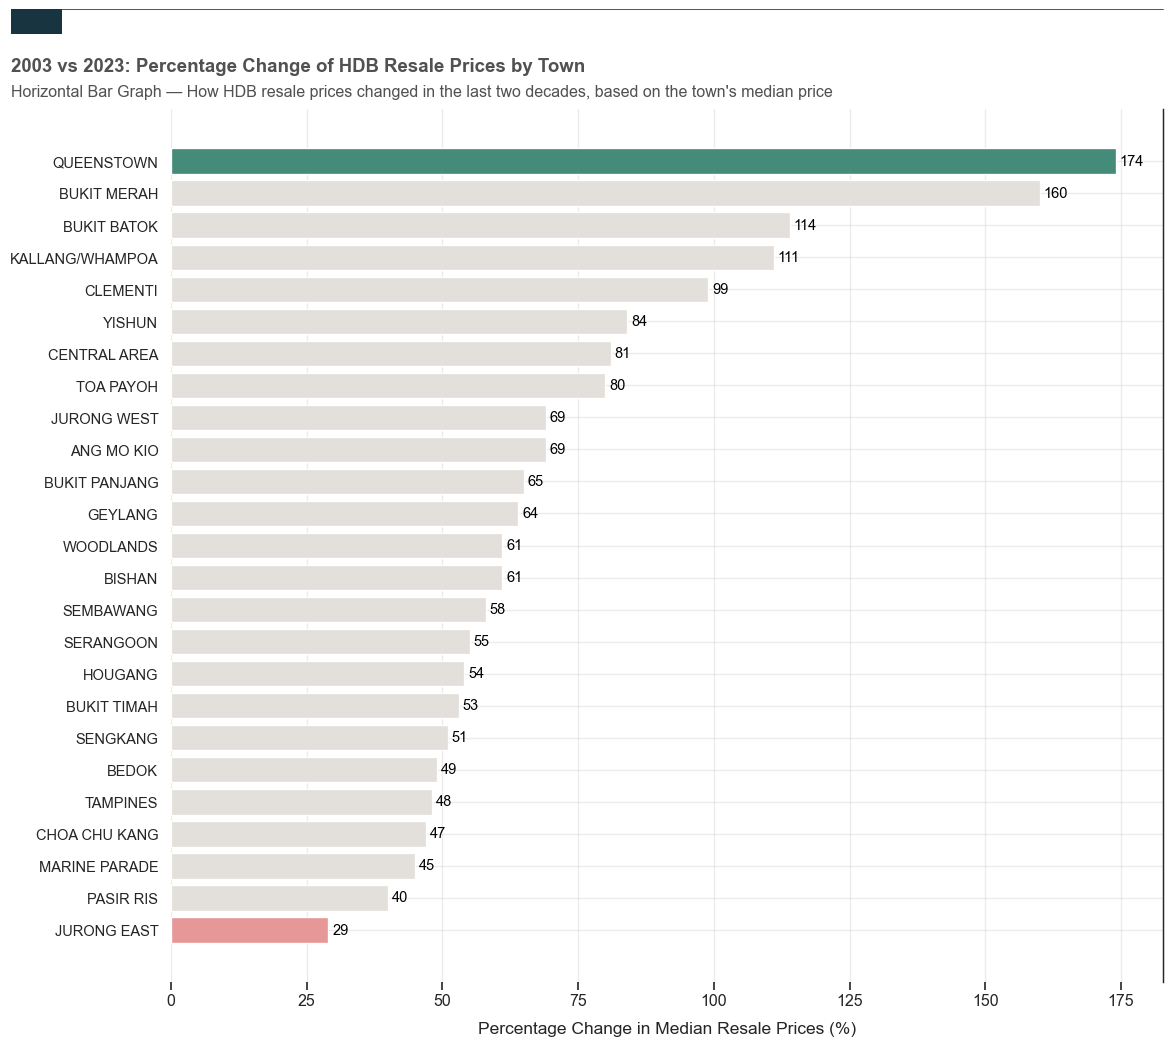

In [19]:
fig, ax = plt.subplots(figsize=(13.33, 13), dpi=96)

smallest_price_change, largest_price_change = town_prices_04_23['change'].min(), town_prices_04_23['change'].max()
colors=['#e3dfda']*len(town_prices_04_23)
# set to lowest and highest prices to red and green respectively
for index, row in town_prices_04_23.iterrows():
    if row['change'] == smallest_price_change:
        colors[index] = '#e69798'
    if row['change'] == largest_price_change:
        colors[index] = '#448c79'

# Plot bars
bar1 = ax.barh(town_prices_04_23['town'], town_prices_04_23['change'], color=colors)

# Grid
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Label x-axis and x ticks
ax.set_xlabel("Percentage Change in Median Resale Prices (%)", fontsize=13, labelpad=10) 
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)

# Add label on top of each bar
ax.bar_label(bar1, labels=[f'{e:,.0f}' for e in town_prices_04_23['change']], padding=3, color='black', fontsize=11) 

# Remove the spines and make the right spine thicker
ax.spines[['top','left','bottom']].set_visible(False)
ax.spines['right'].set_linewidth(1.1)


# Add in red line and rectangle on top
ax.plot([0, 0.9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#193441', linewidth=.6)
ax.add_patch(plt.Rectangle((0,0.98), 0.04, -0.02, facecolor='#193441', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0, y=.93, s="2003 vs 2023: Percentage Change of HDB Resale Prices by Town", transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0, y=.91, s="Horizontal Bar Graph — How HDB resale prices changed in the last two decades, based on the town's median price", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.9, wspace=None, hspace=None)


plt.show()

 **Observations:**

Comparing the percentage change in median HDB resale prices between 2003 and this year, 2023, all the towns in Singapore has generally increased in its median HDB resale prices.

Queenstown has the highest percentage change in its resale prices (157% which is more than double) while Jurong East has the lowest increase in resale prices, at only 29%.

#### Past Two Years (2022 and 2023): Percentage Change of Resale Prices by Town

In [20]:
town_prices_22_23 = hdb_price_df[hdb_price_df['year'].isin([2022,2023])].groupby(['town','year'], as_index=False).agg({'adjusted_price': 'median'})
town_prices_22_23

,town,year,adjusted_price
0,ANG MO KIO,2022,395947.680293
1,ANG MO KIO,2023,403960.609352
2,BEDOK,2022,410962.607810
3,BEDOK,2023,386006.804492
4,BISHAN,2022,643169.539491
5,BISHAN,2023,662495.399338
6,BUKIT BATOK,2022,450218.677643
7,BUKIT BATOK,2023,538614.145803
8,BUKIT MERAH,2022,624537.762297
9,BUKIT MERAH,2023,658904.638365


In [21]:
town_prices_22_23 = hdb_price_df[hdb_price_df['year'].isin([2021,2022])].groupby(['town','year'], as_index=False).agg({'adjusted_price': 'median'})
town_prices_22_23['change'] = town_prices_22_23.groupby('town')['adjusted_price'].apply(lambda x: x.pct_change()*100).round() # calculate percentage change between 2004 and 2023
town_prices_22_23 = town_prices_22_23[town_prices_22_23['change'].notnull()] 
town_prices_22_23 = town_prices_22_23.sort_values('change', ascending=True).reset_index(drop=True).reset_index()
town_prices_22_23

,index,town,year,adjusted_price,change
0,0,CENTRAL AREA,2022,555236.976962,-16.0
1,1,GEYLANG,2022,419613.518655,-13.0
2,2,QUEENSTOWN,2022,644864.420804,-7.0
3,3,CLEMENTI,2022,489400.846482,-7.0
4,4,MARINE PARADE,2022,449443.230573,-6.0
5,5,JURONG EAST,2022,418703.294103,-5.0
6,6,BEDOK,2022,410962.607810,-4.0
7,7,BUKIT TIMAH,2022,659954.263717,-4.0
8,8,SERANGOON,2022,495746.454346,-1.0
9,9,BUKIT MERAH,2022,624537.762297,-1.0


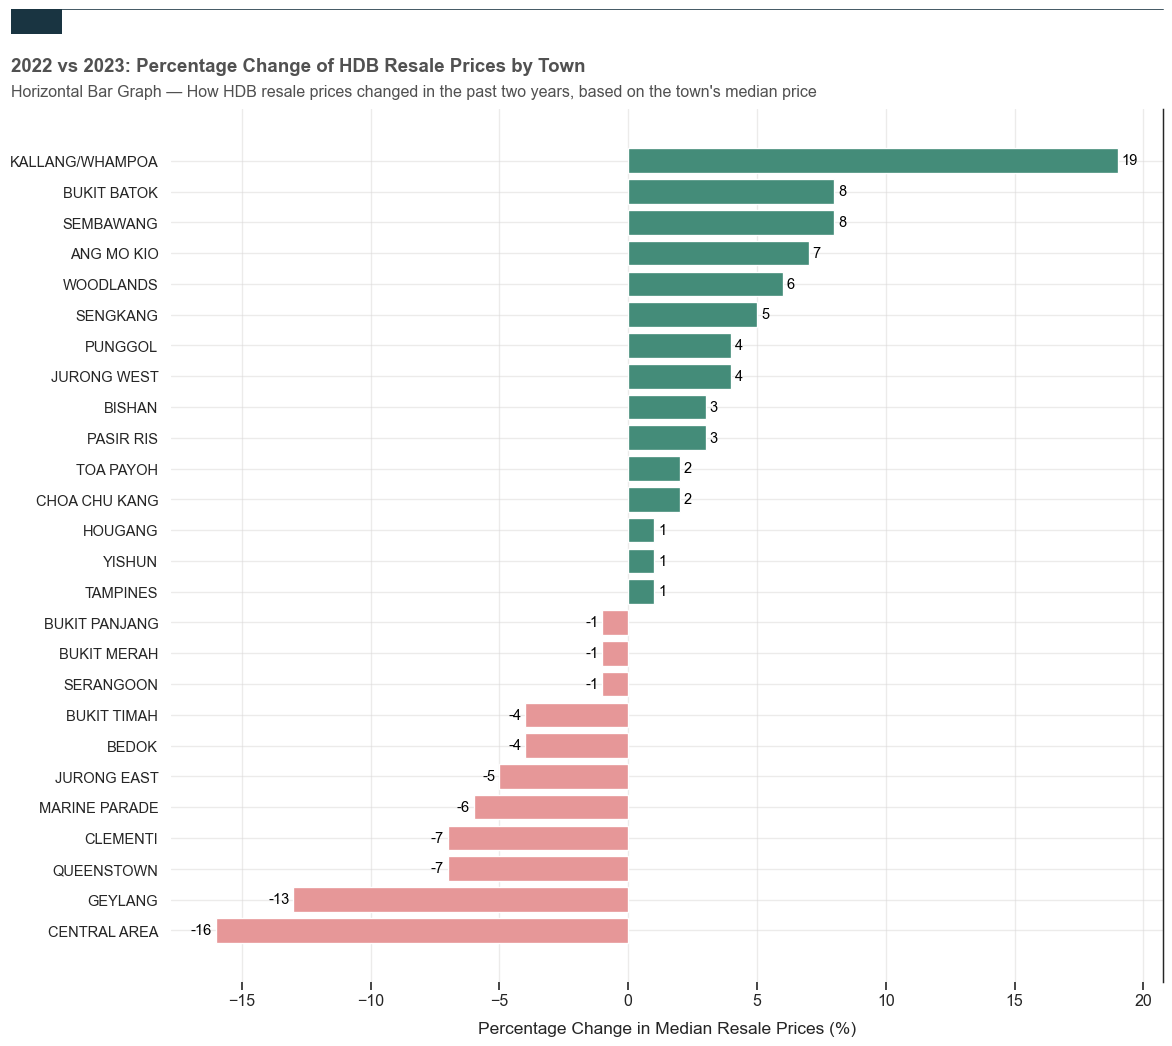

In [22]:
fig, ax = plt.subplots(figsize=(13.33, 13), dpi=96)

# smallest_price_change, largest_price_change = town_prices_22_23['change'].min(), town_prices_22_23['change'].max()
colors=['#e3dfda']*len(town_prices_22_23)
# set to lowest and highest prices to red and green respectively
for index, row in town_prices_22_23.iterrows():
    if row['change'] < 0:
        colors[index] = '#e69798'
    if row['change'] > 0:
        colors[index] = '#448c79'

# Plot bars
bar1 = ax.barh(town_prices_22_23['town'], town_prices_22_23['change'], color=colors)

# Grid
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Label x-axis and x ticks
ax.set_xlabel("Percentage Change in Median Resale Prices (%)", fontsize=13, labelpad=10) 
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)

# Add label on top of each bar
ax.bar_label(bar1, labels=[f'{e:,.0f}' for e in town_prices_22_23['change']], padding=3, color='black', fontsize=11) 

# Remove the spines
ax.spines[['top','left','bottom']].set_visible(False)

# Make the right spine thicker
ax.spines['right'].set_linewidth(1.1)

# Add in red line and rectangle on top
ax.plot([0, 0.9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#193441', linewidth=.6)
ax.add_patch(plt.Rectangle((0,0.98), 0.04, -0.02, facecolor='#193441', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0, y=.93, s="2022 vs 2023: Percentage Change of HDB Resale Prices by Town", transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0, y=.91, s="Horizontal Bar Graph — How HDB resale prices changed in the past two years, based on the town's median price", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.9, wspace=None, hspace=None)

plt.show()

 **Observations:**

The changes are not very significant from 2022 to 2023, generally increase/decrease by about 10%. 

Prices have dropped the most (16%) in Central Area while on the other hand, prices in Kallang/Whampoa have increased the most, by 19%.

Could it be because these areas have older HDB meaning their lease are now shorter? As shown below, it seems that places like Punggol, and Sengkang, tend to have later lease commence date, as they were developed later, which might have led to their slight increase in prices, while places like Toa Payoh and Central Area, tend to have older lease commence date.


In [23]:
hdb_price_df[hdb_price_df['year'].isin([2022,2023])].groupby('town')['lease_commence_date'].median().sort_values()

town
MARINE PARADE      1975.0
ANG MO KIO         1980.0
BEDOK              1980.0
CLEMENTI           1981.0
GEYLANG            1982.0
TOA PAYOH          1984.0
CENTRAL AREA       1984.0
JURONG EAST        1984.0
SERANGOON          1986.0
BUKIT BATOK        1987.0
YISHUN             1988.0
BISHAN             1988.0
TAMPINES           1988.0
BUKIT TIMAH        1988.0
HOUGANG            1991.0
PASIR RIS          1993.0
BUKIT MERAH        1996.0
KALLANG/WHAMPOA    1996.0
JURONG WEST        1997.0
WOODLANDS          1998.0
BUKIT PANJANG      1999.0
CHOA CHU KANG      1999.0
QUEENSTOWN         2003.0
SEMBAWANG          2004.0
SENGKANG           2012.0
PUNGGOL            2014.0
Name: lease_commence_date, dtype: float64

### 4.3 Storey Range

In [24]:
# Storey Prices for 2003 to 2012
storey_03_12 = hdb_price_df_03_12.groupby('storey_range')['adjusted_price'].median().reset_index().sort_values(by='storey_range')
storey_03_12['storey_rank'] = storey_03_12['storey_range'].astype('category').cat.codes + 1 # label encode storey -> give each storey range a rank
storey_03_12

,storey_range,adjusted_price,storey_rank
0,01 TO 03,329708.612238,1
1,01 TO 05,437878.582524,2
2,04 TO 06,338049.172898,3
3,06 TO 10,456597.127412,4
4,07 TO 09,345384.585079,5
5,10 TO 12,352215.687015,6
6,11 TO 15,480799.024156,7
7,13 TO 15,404257.405596,8
8,16 TO 18,448980.485775,9
9,16 TO 20,562986.748960,10


/var/folders/dr/gs9wbbgs2zlcfyqybn5vvrw40000gn/T/ipykernel_8839/3416411860.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  scatter1.set_yticklabels(ylabels)


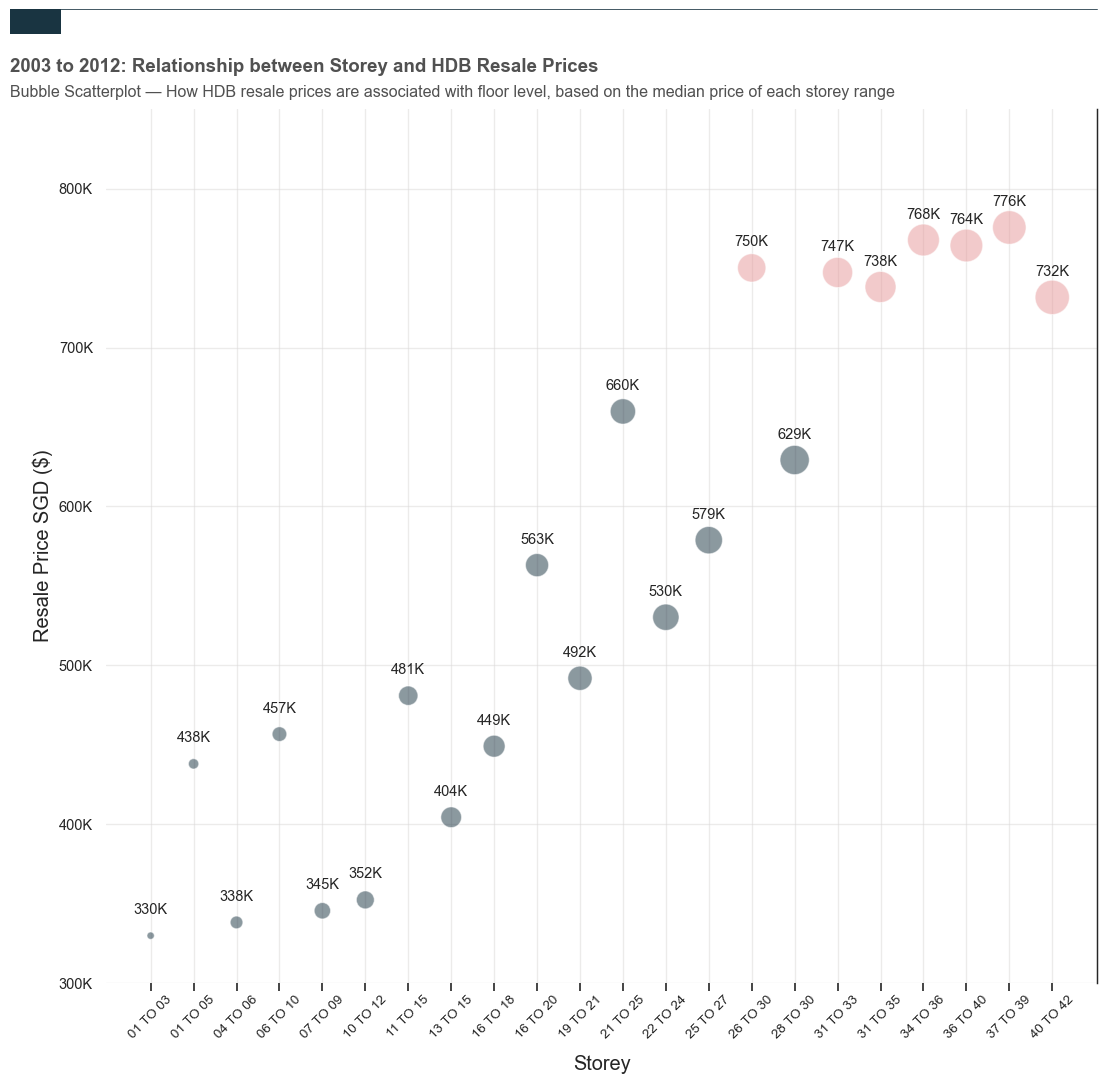

In [25]:
fig, ax = plt.subplots(figsize=(13.33, 13), dpi=96)

# Set colors
colors = ['#193441']*len(storey_03_12)
for index, row in storey_03_12.iterrows():
    if row['adjusted_price'] > 700000:
        colors[index] = '#e69798'

scatter1=sns.scatterplot(x=storey_03_12['storey_range'], y=storey_03_12['adjusted_price'], s=storey_03_12['storey_rank'].astype('int')*30, sizes=(20,200),color=colors, edgecolors='w', alpha=0.5, ax=ax)

# Grid
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Label data points
for i, row in storey_03_12.iterrows():
    # offset = row['storey_rank'] / 50
    label = str(round(row['adjusted_price']/1000)) + 'K'
    plt.annotate(label, xy=(row['storey_range'], row['adjusted_price']), ha='center', va='bottom', xytext=(0, 14), textcoords='offset points', fontsize=11)

# Label x-axis and x ticks
ax.set_xlabel("Percentage Change in Median Resale Prices (%)", fontsize=12, labelpad=10) 
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)
plt.xticks(rotation=45, fontsize=10)

# Reformat y-axis
ylabels = ['{:,.0f}'.format(x) + 'K' for x in scatter1.get_yticks()/1000]
scatter1.set_yticklabels(ylabels)
scatter1.set_ylim([300000,850000])
scatter1.set_ylabel('Resale Price SGD ($)', size=15)
scatter1.set_xlabel('Storey', size=15)

# Remove the spines and make right spine thicker
ax.spines[['top','left','bottom']].set_visible(False)
ax.spines['right'].set_linewidth(1.1)

ax.plot([0.05, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#193441', linewidth=.6)
ax.add_patch(plt.Rectangle((0.05,.98), 0.04, -0.02, facecolor='#193441', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.05, y=.93, s="2003 to 2012: Relationship between Storey and HDB Resale Prices", transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0.05, y=.91, s="Bubble Scatterplot — How HDB resale prices are associated with floor level, based on the median price of each storey range", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.9, wspace=None, hspace=None)

plt.show()

 **Observations:**


For HDB Flats between 1st and 25th floor, as floor level increases, the median HDB resale prices are also associated with an increase. Above 25th floor, the prices remain generally the same as seen from the plateau (red) in the scatter plot.

However, it is noticeable that the labels for the X axis are not well represented as there are overlaps in the storey level. For example, '01 TO '03' is contained within the label '01 TO 05'. Hence, we will adjust the labels of the X axis accordingly.



For example: 
| Old Storey Range      | New Storey Range | 
| :---: |    :----:   |        
| 01 TO 03  | 01 TO 05       |
| 01 TO 05  | 01 TO 05       |


In [26]:
hdb_price_df_03_12['storey_range'].sort_values().unique()

array(['01 TO 03', '01 TO 05', '04 TO 06', '06 TO 10', '07 TO 09',
       '10 TO 12', '11 TO 15', '13 TO 15', '16 TO 18', '16 TO 20',
       '19 TO 21', '21 TO 25', '22 TO 24', '25 TO 27', '26 TO 30',
       '28 TO 30', '31 TO 33', '31 TO 35', '34 TO 36', '36 TO 40',
       '37 TO 39', '40 TO 42'], dtype=object)

In [27]:
hdb_price_df_03_12['storey_range'].nunique()

22

#### Adjustment of Labels in the X Axis

In [28]:
storey_03_12_dict = {'storey_range':[],
                     'adjusted_price':[]}

for index, row in hdb_price_df_03_12.iterrows():
    # print(row['storey_range'], row['adjusted_price'])
    storey, price = row['storey_range'][:2], row['adjusted_price']

    if int(storey) in range(1,6): 
        storey_range = '01 TO 05'
        storey_03_12_dict['storey_range'].append(storey_range)
        storey_03_12_dict['adjusted_price'].append(price)

    if int(storey) in range(6,11): 
        storey_range = '06 TO 10'
        storey_03_12_dict['storey_range'].append(storey_range)
        storey_03_12_dict['adjusted_price'].append(price)

    if int(storey) in range(11,16): 
        storey_range = '11 TO 15'
        storey_03_12_dict['storey_range'].append(storey_range)
        storey_03_12_dict['adjusted_price'].append(price)

    if int(storey) in range(16,21): 
        storey_range = '16 TO 20'
        storey_03_12_dict['storey_range'].append(storey_range)
        storey_03_12_dict['adjusted_price'].append(price)

    if int(storey) in range(21,26): 
        storey_range = '21 TO 25'
        storey_03_12_dict['storey_range'].append(storey_range)
        storey_03_12_dict['adjusted_price'].append(price)

    if int(storey) in range(26,31): 
        storey_range = '26 TO 30'
        storey_03_12_dict['storey_range'].append(storey_range)
        storey_03_12_dict['adjusted_price'].append(price)

    if int(storey) in range(31,36): 
        storey_range = '31 TO 35'
        storey_03_12_dict['storey_range'].append(storey_range)
        storey_03_12_dict['adjusted_price'].append(price)

    if int(storey) in range(36,41): 
        storey_range = '36 TO 40'
        storey_03_12_dict['storey_range'].append(storey_range)
        storey_03_12_dict['adjusted_price'].append(price)

    if int(storey) > 40:
        storey_range = '> 40'
        storey_03_12_dict['storey_range'].append(storey_range)
        storey_03_12_dict['adjusted_price'].append(price)

storey_03_12 = pd.DataFrame.from_dict(storey_03_12_dict)
storey_03_12


,storey_range,adjusted_price
0,06 TO 10,657773.027195
1,01 TO 05,630205.762181
2,11 TO 15,766750.343987
3,06 TO 10,756685.821930
4,06 TO 10,637003.738935
...,...,...
275726,06 TO 10,219344.889929
275727,06 TO 10,227070.524652
275728,01 TO 05,186425.556281
275729,06 TO 10,217717.817505


In [29]:
storey_03_12 = storey_03_12.groupby('storey_range')['adjusted_price'].median().reset_index().sort_values(by='storey_range')
storey_03_12['storey_rank'] = storey_03_12['storey_range'].astype('category').cat.codes + 1 # label encode storey -> give each storey range a rank
storey_03_12

,storey_range,adjusted_price,storey_rank
0,01 TO 05,336531.401439,1
1,06 TO 10,350926.989124,2
2,11 TO 15,409633.745418,3
3,16 TO 20,463389.727871,4
4,21 TO 25,552616.108172,5
5,26 TO 30,638049.068471,6
6,31 TO 35,758554.351685,7
7,36 TO 40,766985.283967,8


/var/folders/dr/gs9wbbgs2zlcfyqybn5vvrw40000gn/T/ipykernel_8839/1759168102.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  scatter1.set_yticklabels(ylabels)


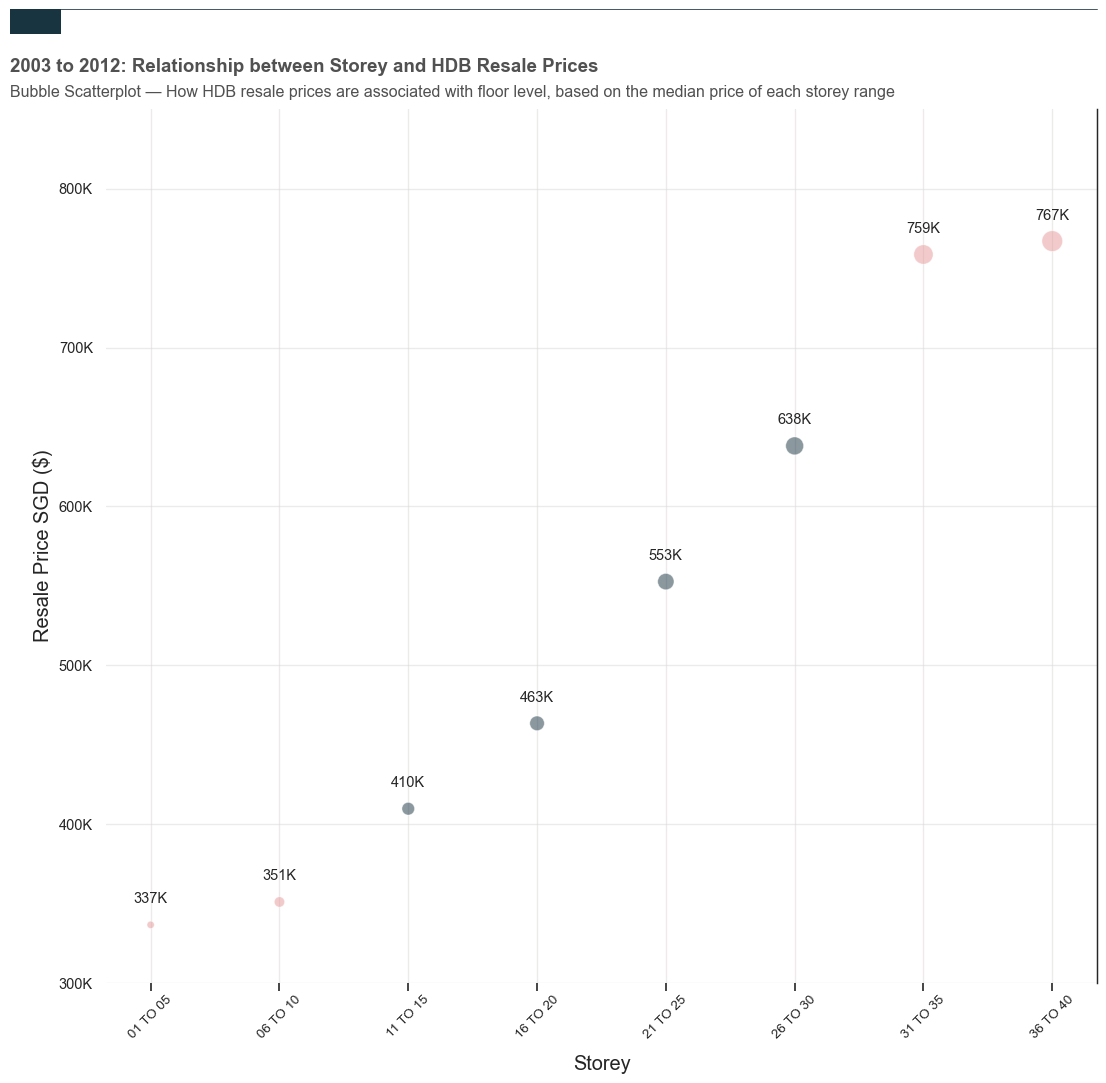

In [30]:
fig, ax = plt.subplots(figsize=(13.33, 13), dpi=96)

# Set colors
colors = ['#193441']*len(storey_03_12)
for index, row in storey_03_12.iterrows():
    if row['adjusted_price'] > 700000 or row['adjusted_price'] < 400000:
        colors[index] = '#e69798'

scatter1=sns.scatterplot(x=storey_03_12['storey_range'], y=storey_03_12['adjusted_price'], s=storey_03_12['storey_rank'].astype('int')*30, sizes=(20,200),color=colors, edgecolors='w', alpha=0.5, ax=ax)

# Grid
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Label data points
for i, row in storey_03_12.iterrows():
    # offset = row['storey_rank'] / 50
    label = str(round(row['adjusted_price']/1000)) + 'K'
    plt.annotate(label, xy=(row['storey_range'], row['adjusted_price']), ha='center', va='bottom', xytext=(0, 14), textcoords='offset points', fontsize=11)

# Label x-axis and x ticks
ax.set_xlabel("Percentage Change in Median Resale Prices (%)", fontsize=12, labelpad=10) 
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)
plt.xticks(rotation=45, fontsize=10)

# Reformat y-axis
ylabels = ['{:,.0f}'.format(x) + 'K' for x in scatter1.get_yticks()/1000]
scatter1.set_yticklabels(ylabels)
scatter1.set_ylim([300000,850000])
scatter1.set_ylabel('Resale Price SGD ($)', size=15)
scatter1.set_xlabel('Storey', size=15)

# Remove the spines and make right spine thicker
ax.spines[['top','left','bottom']].set_visible(False)
ax.spines['right'].set_linewidth(1.1)

ax.plot([0.05, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#193441', linewidth=.6)
ax.add_patch(plt.Rectangle((0.05,.98), 0.04, -0.02, facecolor='#193441', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.05, y=.93, s="2003 to 2012: Relationship between Storey and HDB Resale Prices", transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0.05, y=.91, s="Bubble Scatterplot — How HDB resale prices are associated with floor level, based on the median price of each storey range", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.9, wspace=None, hspace=None)

plt.show()

 **Observations:**

After adjusting for overlappping Storey Ranges (i.e. x-axis labels), there is a clearer trend observed. As floor level increases, HDB Resale Prices are generally associated with an increase as well. However, the rate of increase at the lower and higher floors (indicated in red) are almost negligible compared to that in the middle floors.

<font color='#ffab40'> 

**Comparing across both 10-year periods:**

For 2003 to 2012, at the high floors, the HDB Resale Prices tend to plateau and does not increase as much compared to the middle floors. However, for 2013 to 2023, HDB Resale Prices continuously increase as floor level increases, regardless of how high the floor gets. In fact, above 37th floor, the rate of increase of prices is still increasing, and HDB Flats in those floors are fetching close to or more than SGD$1 Million.
</font>


### 4.4 Floor Area

/var/folders/dr/gs9wbbgs2zlcfyqybn5vvrw40000gn/T/ipykernel_8839/63038850.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylabels)


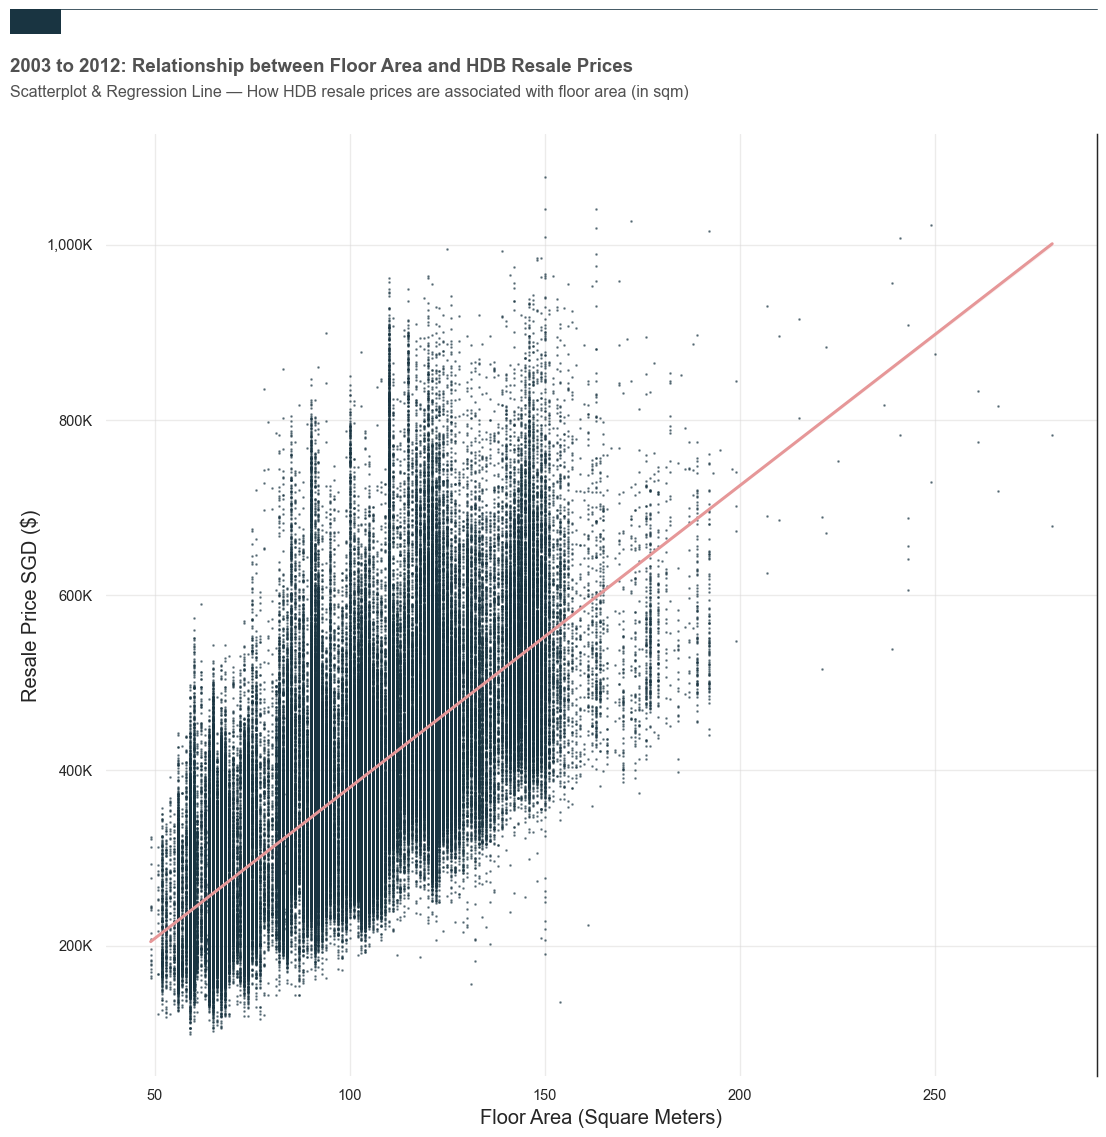

In [31]:
fig, ax = plt.subplots(figsize=(13.33, 13), dpi=96)

# Grid
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

p=sns.regplot(x='floor_area_sqm', y='adjusted_price', data=hdb_price_df_03_12, color='#e69798', scatter_kws={"s": 1, 'alpha':0.5, 'color':'#193441'})
ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)
p.set_ylabel('Resale Price SGD ($)', size=15)
p.set_xlabel('Floor Area (Square Meters)', size=15)

# Remove the spines and make right thicker
ax.spines[['top','left','bottom']].set_visible(False)
ax.spines['right'].set_linewidth(1.1)

ax.plot([0.05, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#193441', linewidth=.6)
ax.add_patch(plt.Rectangle((0.05,.98), 0.04, -0.02, facecolor='#193441', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.05, y=.93, s="2003 to 2012: Relationship between Floor Area and HDB Resale Prices", transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0.05, y=.91, s="Scatterplot & Regression Line — How HDB resale prices are associated with floor area (in sqm)", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

plt.show()

**Observations:**

As floor area of a HDB resale flat increases, its resale price is associated with an increase as well. Majority of transacted HDB resale flats have a floor area of between 50 and 200 square metres.

<font color='#ffab40'> 

**Comparing across both 10-year periods:**

Not much visible difference between the steepness of graphs showing the relationship between Floor Area and HDB Resale Prices across both decades.

</font>

#### Using Median Prices for each Floor Area

In [32]:
floor_area_03_12 = hdb_price_df_03_12.groupby(['floor_area_sqm'], as_index=False).agg({'adjusted_price':'median'})
floor_area_03_12 # 167 data points

,floor_area_sqm,adjusted_price
0,49.0,207312.016780
1,51.0,252503.126358
2,52.0,216487.918979
3,53.0,219766.013832
4,54.0,254647.014645
...,...,...
163,249.0,875602.884018
164,250.0,875404.874755
165,261.0,803462.620740
166,266.0,766829.167725


/var/folders/dr/gs9wbbgs2zlcfyqybn5vvrw40000gn/T/ipykernel_8839/3282878973.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylabels)


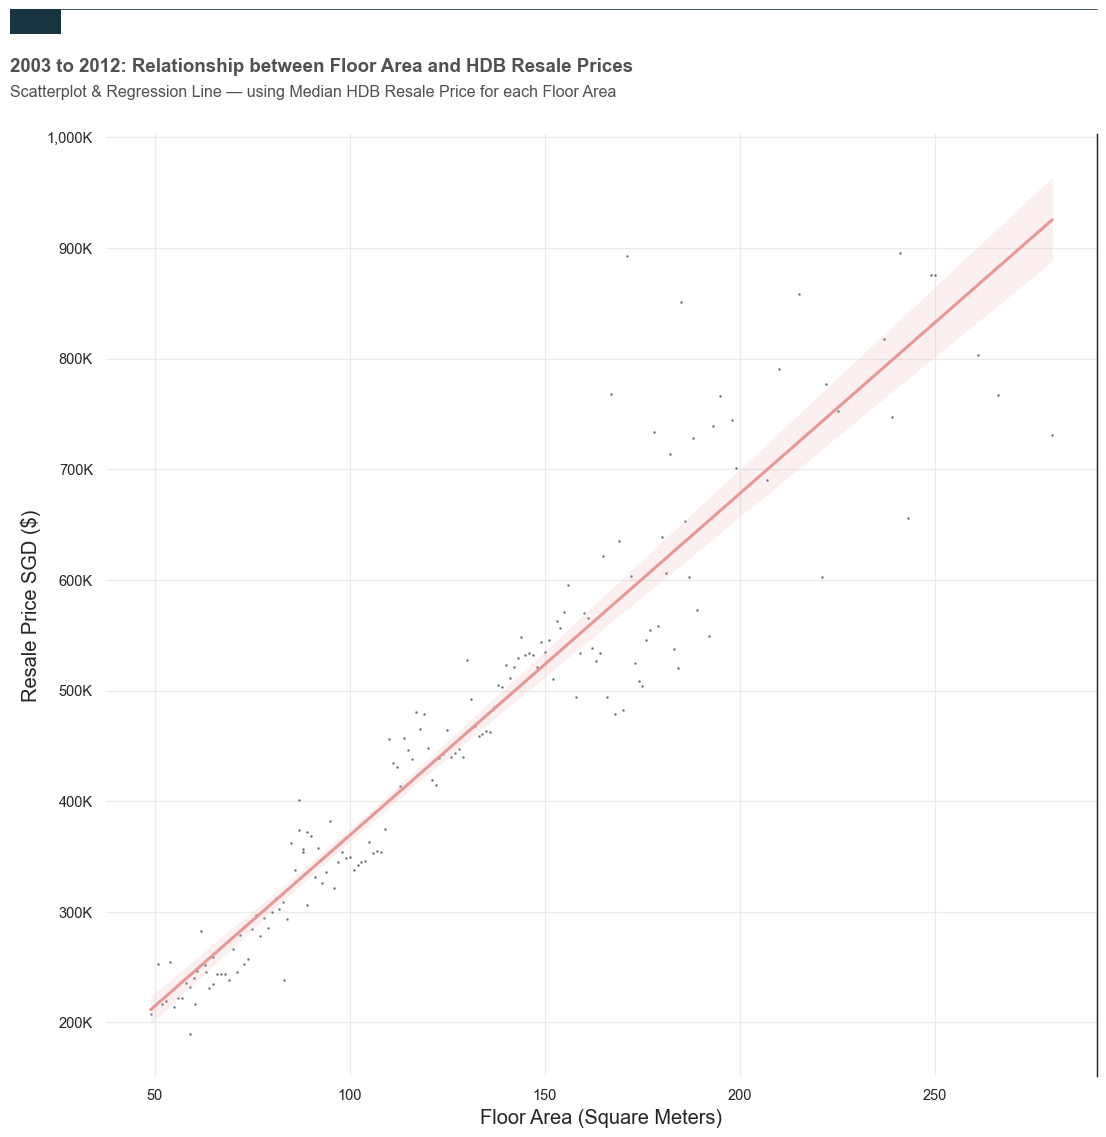

In [33]:
fig, ax = plt.subplots(figsize=(13.33, 13), dpi=96)

# Grid
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

p=sns.regplot(x='floor_area_sqm', y='adjusted_price', data=floor_area_03_12, color='#e69798', scatter_kws={"s": 1, 'alpha':0.5, 'color':'#193441'})
ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)
p.set_ylabel('Resale Price SGD ($)', size=15)
p.set_xlabel('Floor Area (Square Meters)', size=15)

# Remove the spines and make right thicker
ax.spines[['top','left','bottom']].set_visible(False)
ax.spines['right'].set_linewidth(1.1)

ax.plot([0.05, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#193441', linewidth=.6)
ax.add_patch(plt.Rectangle((0.05,.98), 0.04, -0.02, facecolor='#193441', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.05, y=.93, s="2003 to 2012: Relationship between Floor Area and HDB Resale Prices", transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0.05, y=.91, s="Scatterplot & Regression Line — using Median HDB Resale Price for each Floor Area", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

plt.show()

In [34]:
# what are those HDBs which have bigger than 200 sqm of floor area
above_200_sqm_df = hdb_price_df_03_12[hdb_price_df_03_12['floor_area_sqm'] > 200].reset_index()
above_200_sqm_df.groupby('flat_model')['index'].nunique()

flat_model
Apartment              2
Maisonette             5
Premium Maisonette     2
Terrace               22
Name: index, dtype: int64

**Observations:**

Trend is similar to without taking median prices for each floor area; previous visualization.

Flat Models of HDBs which have larger than 200 sqm of floor area are mostly Terrace, which is not surprising.

<font color='#ffab40'> 

**Comparing across both 10-year periods:**

Not much visible difference between the steepness of graphs showing the relationship between Floor Area and HDB Resale Prices across both decades.

</font>

### 4.5 Block Number
3 digit system was introduced in the 1970s, with the 1st digit representing a neighbourhood in a town. So for e.g., AMK neighbourhood 1 starts with 101, and AMK neighbourhood 2 starts with 201. So first digit was separated from last 2 digits and plotted separately

/var/folders/dr/gs9wbbgs2zlcfyqybn5vvrw40000gn/T/ipykernel_8839/3980874740.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ylabels)
/var/folders/dr/gs9wbbgs2zlcfyqybn5vvrw40000gn/T/ipykernel_8839/3980874740.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ylabels)


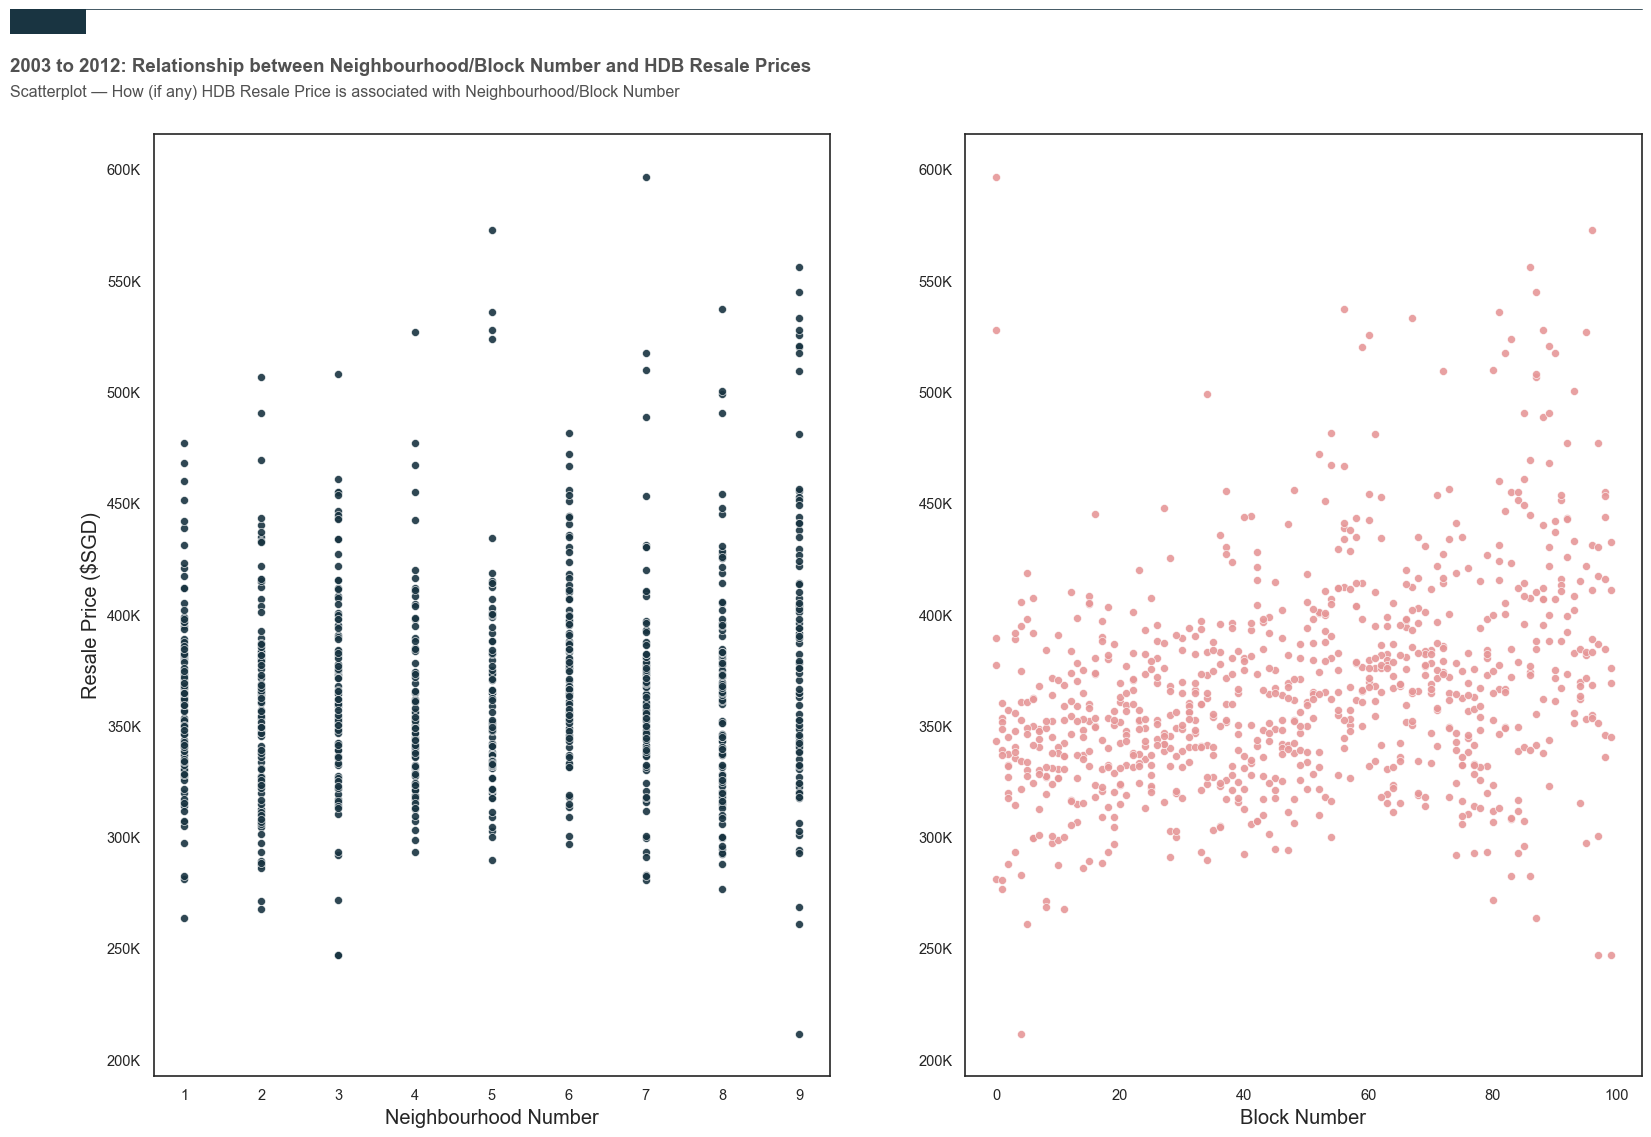

In [121]:
import re

# Block Number Prices
get_num = lambda x: int(re.findall("\d+", x)[0])
hdb_price_df_03_12['blocknum'] = hdb_price_df_03_12['block'].apply(get_num) # get only digits from block number
tmp = hdb_price_df_03_12[hdb_price_df_03_12['blocknum'] > 99] # get only blocks that use 3-digit numbering system
tmp = tmp.groupby('blocknum')['adjusted_price'].median().reset_index()

fig, ax = plt.subplots(figsize=(20, 13), dpi=96)

ax1 = plt.subplot(121)
a=sns.scatterplot(x=tmp['blocknum'].apply(lambda x: int(str(x)[0])), y=tmp['adjusted_price'], color='#193441', edgecolors='w', alpha=0.9)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in a.get_yticks()/1000]
ax1.set_yticklabels(ylabels)
ax1.set_ylabel('Resale Price ($SGD)', size=15), ax1.set_xlabel('Neighbourhood Number', size=15)

ax2 = plt.subplot(122)
b=sns.scatterplot(x=tmp['blocknum'].apply(lambda x: int(str(x)[1:])), y=tmp['adjusted_price'], color = '#e69798',edgecolors='w', alpha=0.9)
ax2.set_yticklabels(ylabels)
ax2.set_ylabel('', size=15)
ax2.set_xlabel('Block Number', size=15)

# Add in line and rectangle on top
plt.plot([0.05, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#193441', linewidth=.6)
ax1.add_patch(plt.Rectangle((0.05,.98), 0.04, -0.02, facecolor='#193441', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
plt.text(x=0.05, y=.93, s="2003 to 2012: Relationship between Neighbourhood/Block Number and HDB Resale Prices", transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
plt.text(x=0.05, y=.91, s="Scatterplot — How (if any) HDB Resale Price is associated with Neighbourhood/Block Number", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

plt.show()

**Observations:**

Neighbourhood/Block Number does not seem to have any association with HDB Resale Prices.

<font color='#ffab40'> 

**Comparing across both 10-year periods:**

Not much visible difference in the scatter plots across both decades.

</font>

### 4.6 Flat Model

/var/folders/dr/gs9wbbgs2zlcfyqybn5vvrw40000gn/T/ipykernel_8839/1127161346.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_xticklabels(xlabels)


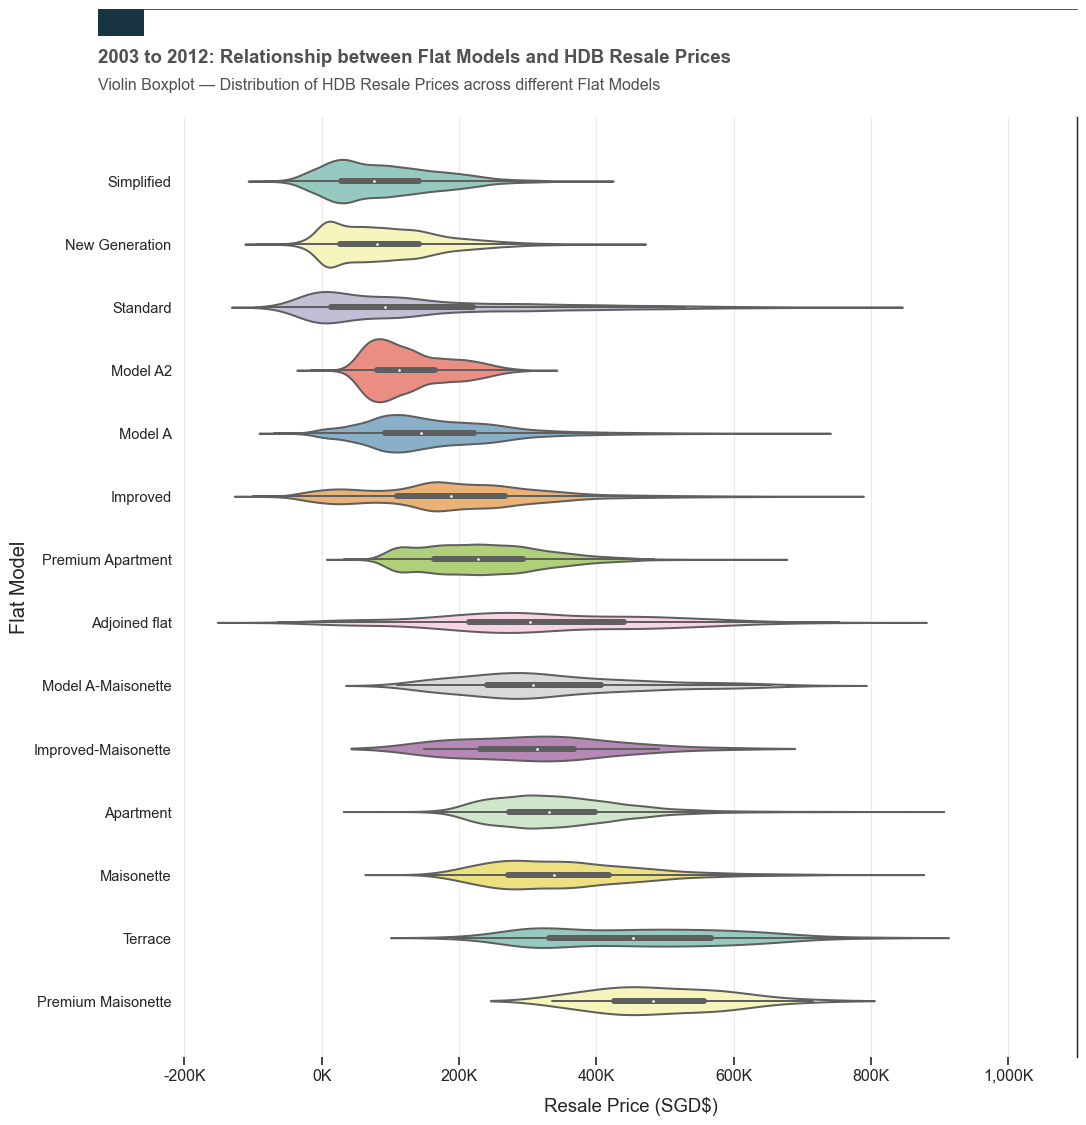

In [164]:
fig, ax = plt.subplots(figsize=(12, 14), dpi=96)

# Grid
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

p=sns.violinplot(x='adjusted_price', 
                 y='flat_model', 
                 data=hdb_price_df_03_12, 
                 width=1,
                 orient='h', # horizontal plot
                 order=hdb_price_df_03_12.groupby('flat_model')['adjusted_price'].median().sort_values().reset_index()['flat_model'].tolist(),
                 palette='Set3')

# Label x-axis and x ticks
p.set_xlabel("Resale Price (SGD$)", fontsize=14, labelpad=10) 
xlabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_xticks()/1000]
p.set_xticklabels(xlabels)
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)
p.set_xlim([0,1300000])

# Reformat y-axis
# ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
# p.set_yticklabels(ylabels)
p.set_ylabel("Flat Model", size=15)
# p.set_ylim([50000,1300000])

# Remove the spines and make right spine thicker
ax.spines[['top','left','bottom']].set_visible(False)
ax.spines['right'].set_linewidth(1.1)

ax.plot([0.05, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#193441', linewidth=.6)
ax.add_patch(plt.Rectangle((0.05,.98), 0.04, -0.02, facecolor='#193441', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.05, y=.94, s="2003 to 2012: Relationship between Flat Models and HDB Resale Prices", transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0.05, y=.92, s="Violin Boxplot — Distribution of HDB Resale Prices across different Flat Models", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.9, wspace=None, hspace=None)

plt.show()

**Observations:**

Flat Models like Terrace and Premium Maisonette have relatively high median resale prices, compared to Simplified, New Generation and Standard flat models. Adjoined Flat has the largest range. Oddly, some flat models have negative resale prices.

<font color='#ffab40'> 

**Comparing across both 10-year periods:**

Not much visible difference between the violin plot distributions showing the relationship between Flat Model and HDB Resale Prices across both decades.

</font>

In [99]:
x = np.array((hdb_price_df_03_12['adjusted_price'] < 0).to_list())
np.unique(x)


array([False])

### 4.7 Lease Commence Date (in Years)

/var/folders/dr/gs9wbbgs2zlcfyqybn5vvrw40000gn/T/ipykernel_8839/2707222080.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


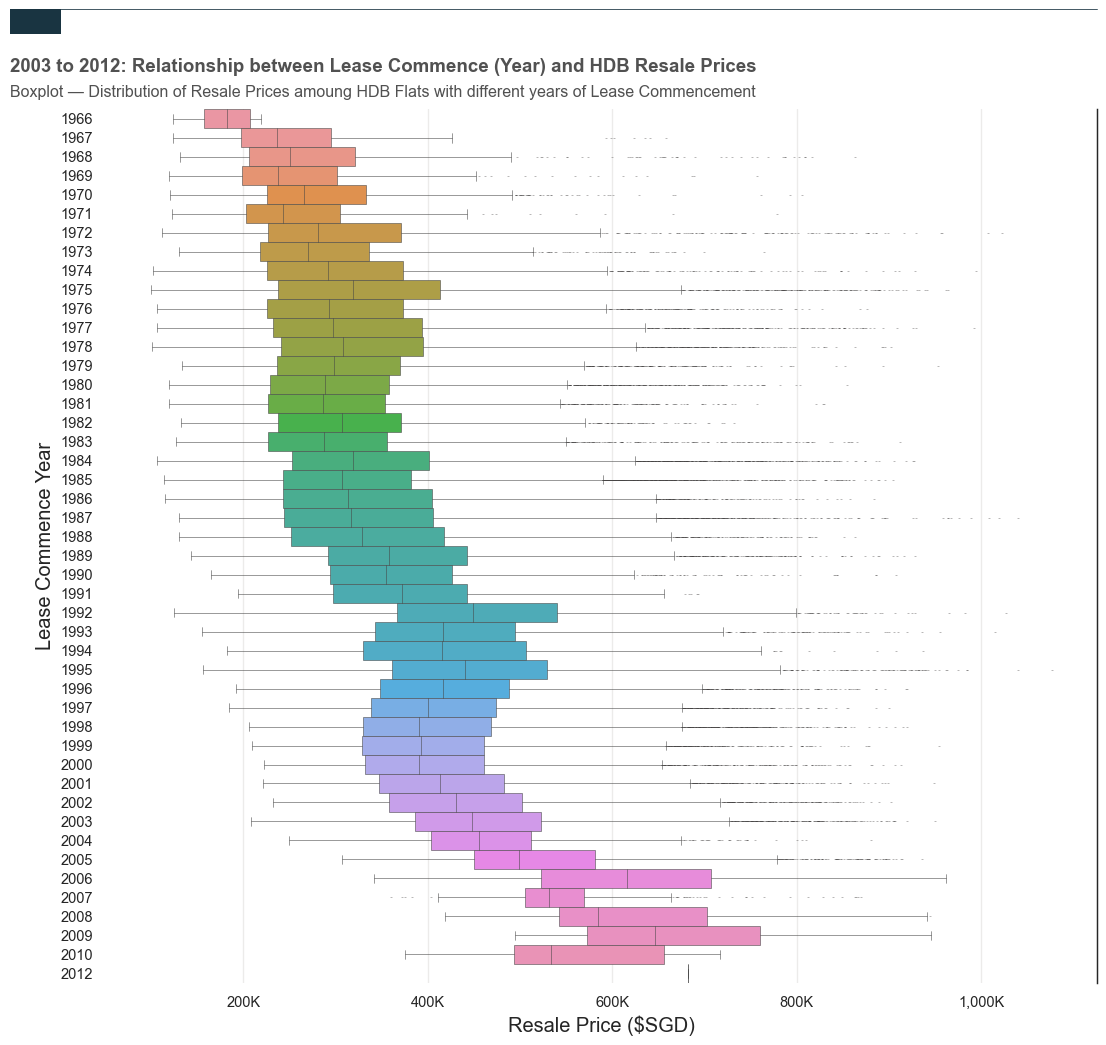

In [110]:
fig, ax = plt.subplots(figsize=(13.33, 13), dpi=96)

# Grid
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

a=sns.boxplot(y='lease_commence_date', x='adjusted_price', data=hdb_price_df_03_12, width=1, orient='h', flierprops = dict(markerfacecolor = 'red', markersize = 0.1, linestyle='none'), linewidth=0.4)
ax.set_xlabel('Resale Price ($SGD)', size=15)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in a.get_xticks()/1000]
ax.set_xticklabels(xlabels)
p.set_xlim([0,1300000])

ax.set_ylabel('Lease Commence Year', size=15)


# Remove the spines and make right spine thicker
ax.spines[['top','left','bottom']].set_visible(False)
ax.spines['right'].set_linewidth(1.1)

ax.plot([0.05, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#193441', linewidth=.6)
ax.add_patch(plt.Rectangle((0.05,.98), 0.04, -0.02, facecolor='#193441', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.05, y=.93, s="2003 to 2012: Relationship between Lease Commence (Year) and HDB Resale Prices", transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0.05, y=.91, s="Boxplot — Distribution of Resale Prices amoung HDB Flats with different years of Lease Commencement", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.9, wspace=None, hspace=None)

plt.show()


 **Observations:**

HDB Flats with earlier Lease Commence Dates generally fetch lower Median Resale Prices compared to those that have more recent Lease Commence Dates. 

<font color='#ffab40'> 

**Comparing across both 10-year periods:**

Not much visible difference between the boxplot distributions showing the relationship between Lease Commence and HDB Resale Prices across both decades.

</font>

### 4.8 Remaining Lease (in Years)

In [38]:
hdb_price_df['remaining_lease'].unique()

array([ 85.        ,  86.        ,  87.        ,  88.        ,
        89.        ,  90.        ,  91.        ,  92.        ,
        93.        ,  94.        ,  70.        ,  71.        ,
        72.        ,  73.        ,  74.        ,  75.        ,
        76.        ,  77.        ,  78.        ,  79.        ,
        80.        ,  81.        ,  82.        ,  83.        ,
        84.        ,  65.        ,  66.        ,  67.        ,
        68.        ,  69.        ,  95.        ,  96.        ,
        54.        ,  55.        ,  56.        ,  57.        ,
        58.        ,  59.        ,  60.        ,  61.        ,
        62.        ,  63.        ,  64.        ,  97.        ,
        98.        ,  99.        , 100.        , 101.        ,
        74.33333333,  74.58333333,  74.66666667,  75.08333333,
        75.58333333,  76.5       ,  76.66666667,  76.75      ,
        79.08333333,  80.16666667,  59.41666667,  60.16666667,
        60.33333333,  60.91666667,  60.83333333,  61.08

In [39]:
hdb_price_df['remaining_lease'].nunique() 

661

In [40]:
remaining_lease_04_13 = hdb_price_df_03_12[['remaining_lease','adjusted_price']]
print(remaining_lease_04_13['adjusted_price'].min(),remaining_lease_04_13['adjusted_price'].max())

99687.64537781618 1077064.5754671313


In [41]:
remaining_lease_04_13

,remaining_lease,adjusted_price
0,85.0,657773.027195
1,85.0,630205.762181
2,85.0,766750.343987
3,85.0,756685.821930
4,86.0,637003.738935
...,...,...
278867,74.0,219344.889929
278868,74.0,227070.524652
278869,74.0,186425.556281
278870,74.0,217717.817505


In [42]:
remaining_lease_04_13.nunique()

remaining_lease       48
adjusted_price     56894
dtype: int64

/var/folders/dr/gs9wbbgs2zlcfyqybn5vvrw40000gn/T/ipykernel_8839/2214177128.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylabels)


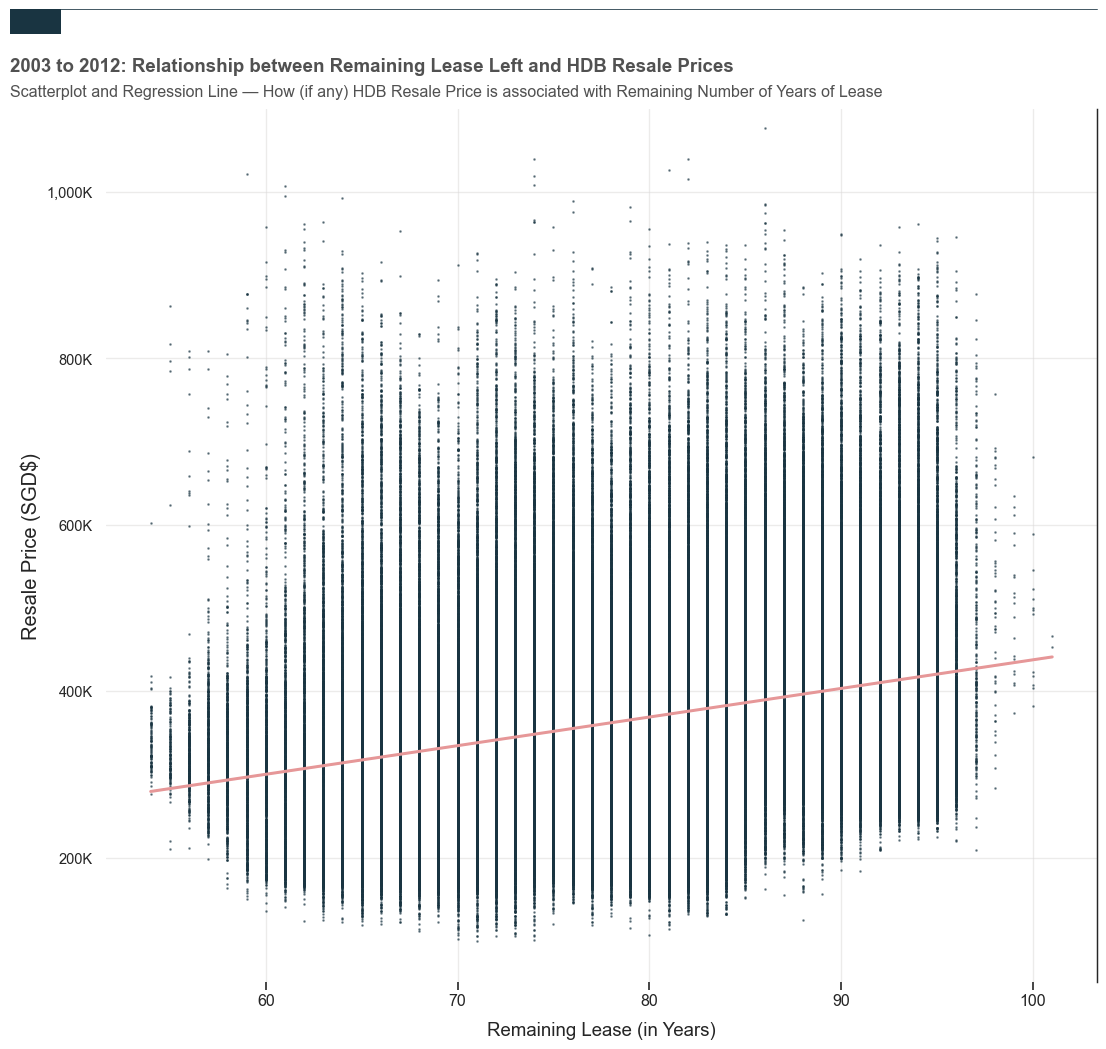

In [113]:
fig, ax = plt.subplots(figsize=(13.33, 13), dpi=96)

# Grid
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# 2004 to 2013
p=sns.regplot(x='remaining_lease', y='adjusted_price', data=remaining_lease_04_13, color='#e69798', scatter_kws={"s": 1, 'alpha':0.5, 'color':'#193441'})

# Label x-axis and x ticks
ax.set_xlabel("Remaining Lease (in Years)", fontsize=14, labelpad=10) 
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)

# Reformat y-axis
p.set_ylabel('Resale Price (SGD$)', size=15)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)
p.set_ylim([50000,1100000])

# Remove the spines and make right thicker
ax.spines[['top','left','bottom']].set_visible(False)
ax.spines['right'].set_linewidth(1.1)

# Add in line and rectangle on top
ax.plot([0.05, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#193441', linewidth=.6)
ax.add_patch(plt.Rectangle((0.05,.98), 0.04, -0.02, facecolor='#193441', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.05, y=.93, s="2003 to 2012: Relationship between Remaining Lease Left and HDB Resale Prices", transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0.05, y=.91, s="Scatterplot and Regression Line — How (if any) HDB Resale Price is associated with Remaining Number of Years of Lease", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.9, wspace=None, hspace=None)

plt.show()

**Observations:**

Newer HDB Flats (i.e. longer remaining lease) are associated with higher Resale Prices.

<font color='#ffab40'> 

**Comparing across both 10-year periods:**

Not much visible difference between the steepness of graphs showing the relationship between Remaining Lease and HDB Resale Prices across both decades.

</font>

## 5. Exploring the Relationship between <font color='#448c79'> Locational Features </font> and HDB Resale Prices

The table below summarizes the ***locational features*** of a flat that we will be conducting EDA with —
| No.      | Feature Name | Values    |
| :---|    :----:   |          :---: |
| 1   | *`mrt_count_within_1km`*       | 1, 2, 3, ...|
| 2   | *`mall_count_within_1km`*        | 1, 2, 3, ...|
| 3   | *`good_sch_count_within_1km`*      | 1, 2, 3, ...|
| 4   | *`shortest_dist_mrt`*        | 1, 2, 3, ...|
| 5   | *`shortest_dist_mall`*        | 1, 2, 3, ...|
| 6   | *`good_sch_score`*        | 1, 2, 3, ...|
| 7   | *`distance_to_cbd_km`*        | 1, 2, 3, ...|
| 8   | *`matured`*        | 0 or 1|

### 5.1 Number of Amenities within 1 km
Amenities are defined as MRT Stations, Shopping Malls and Good Schools.

/var/folders/dr/gs9wbbgs2zlcfyqybn5vvrw40000gn/T/ipykernel_8839/881328384.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ylabels)
/var/folders/dr/gs9wbbgs2zlcfyqybn5vvrw40000gn/T/ipykernel_8839/881328384.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ylabels)
/var/folders/dr/gs9wbbgs2zlcfyqybn5vvrw40000gn/T/ipykernel_8839/881328384.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels(ylabels)


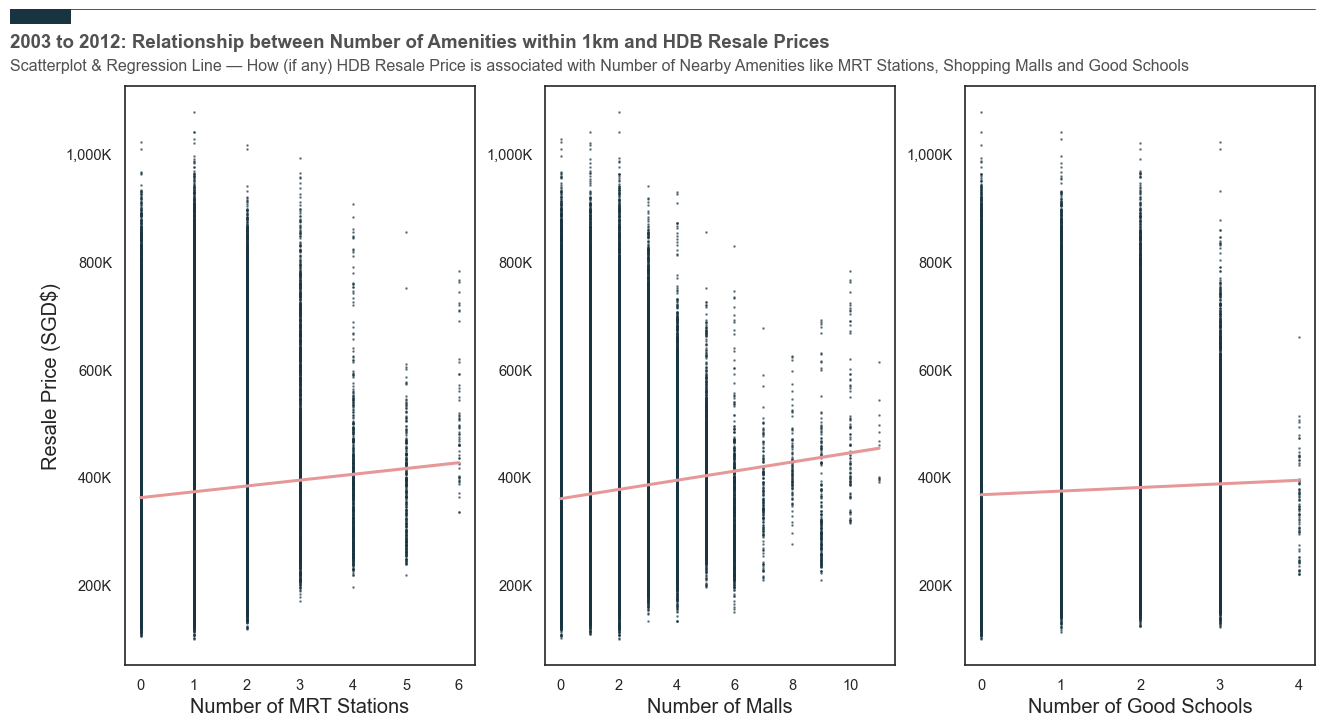

In [140]:
import re

fig, ax = plt.subplots(figsize=(16,8), dpi=96)

# Number of MRT stations within 1 km
ax1 = plt.subplot(131)
a=sns.regplot(x='mrt_count_within_1km', y='adjusted_price', data=hdb_price_df_03_12, color='#e69798', scatter_kws={"s": 1, 'alpha':0.5, 'color':'#193441'})
ylabels = ['{:,.0f}'.format(x) + 'K' for x in a.get_yticks()/1000]
ax1.set_yticklabels(ylabels)
ax1.set_ylabel('Resale Price (SGD$)', size=15)
ax1.set_xlabel('Number of MRT Stations', size=15)

# Number of Malls within 1 km
ax2 = plt.subplot(132)
b=sns.regplot(x='mall_count_within_1km', y='adjusted_price', data=hdb_price_df_03_12, color = '#e69798', scatter_kws={"s": 1, 'alpha':0.5, 'color':'#193441'})
ax2.set_yticklabels(ylabels)
ax2.set_ylabel('', size=15)
ax2.set_xlabel('Number of Malls', size=15)

# Number of Good Schools within 1 km
ax3 = plt.subplot(133)
c=sns.regplot(x='good_sch_count_within_1km', y='adjusted_price', data=hdb_price_df_03_12, color = '#e69798', scatter_kws={"s": 1, 'alpha':0.5, 'color':'#193441'})
ax3.set_yticklabels(ylabels)
ax3.set_ylabel('', size=15)
ax3.set_xlabel('Number of Good Schools', size=15)

# Add in line and rectangle on top
ax1.plot([0.05, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#193441', linewidth=.6)
ax1.add_patch(plt.Rectangle((0.05,.98), 0.04, -0.02, facecolor='#193441', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax1.text(x=0.05, y=.93, s="2003 to 2012: Relationship between Number of Amenities within 1km and HDB Resale Prices", transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax1.text(x=0.05, y=.90, s="Scatterplot & Regression Line — How (if any) HDB Resale Price is associated with Number of Nearby Amenities like MRT Stations, Shopping Malls and Good Schools", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

plt.show()

 **Observations:**

(Relative Comparison)

Number of MRT Stations within 1km vs HDB Resale Price: 
- Weak and postiive correlation

Number of Malls within 1km vs HDB Resale Price:
- Strong and postiive correlation

Number of Good Schools within 1km vs HDB Resale Price:
- Very weak (little to no) and positive correlation 

<font color='#ffab40'>

**Comparing across both 10-year periods:**

We can see a trend that having more MRT Stations that are nearby HDB Flats, are starting to get significantly more popular in the recent decade as shown in the increase in steepness of the regression line (2013 to 2023 graph). We cannot really say the same for the number of nearby malls and good schools. 

</font>

### 5.2 Distance to Nearest MRT (in km)

In [129]:
print(hdb_price_df_03_12['shortest_dist_mrt'].min(), hdb_price_df_03_12['shortest_dist_mrt'].max())

7.395791802037197

/var/folders/dr/gs9wbbgs2zlcfyqybn5vvrw40000gn/T/ipykernel_8839/3421450413.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylabels)


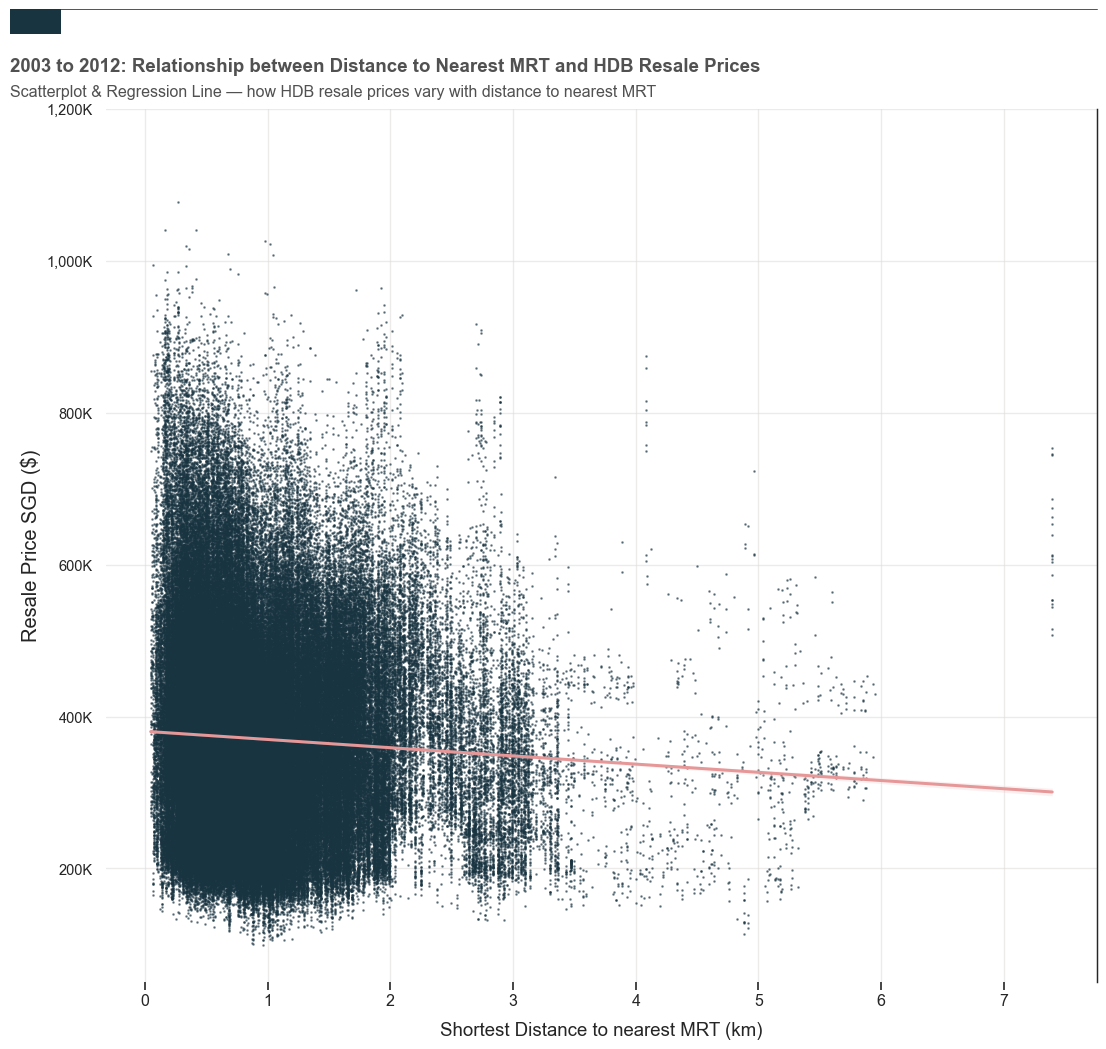

In [131]:
fig, ax = plt.subplots(figsize=(13.33, 13), dpi=96)

# Grid
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

p=sns.regplot(x='shortest_dist_mrt', y='adjusted_price', data=hdb_price_df_03_12, color='#e69798', scatter_kws={"s": 1, 'alpha':0.5, 'color':'#193441'})

# Label x-axis and x ticks
ax.set_xlabel("Shortest Distance to nearest MRT (km)", fontsize=14, labelpad=10) 
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)

# Reformat y-axis
p.set_ylabel('Resale Price SGD ($)', size=15)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)
p.set_ylim([50000,1200000])

# Remove the spines and Make right spine thicker
ax.spines[['top','left','bottom']].set_visible(False)
ax.spines['right'].set_linewidth(1.1)

ax.plot([0.05, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#193441', linewidth=.6)
ax.add_patch(plt.Rectangle((0.05,.98), 0.04, -0.02, facecolor='#193441', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.05, y=.93, s="2003 to 2012: Relationship between Distance to Nearest MRT and HDB Resale Prices", transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0.05, y=.91, s="Scatterplot & Regression Line — how HDB resale prices vary with distance to nearest MRT", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.9, wspace=None, hspace=None)

plt.show()

 **Observations:**

General trend is that the further away the HDB is from the nearest MRT, it is associated with a decrease in its resale price. 

Surprisingly, some HDBs are more than 7km away from the nearest MRT have a relatively high resale price. Let's see which town(s) these HDBs belong to

<font color='#ffab40'>

**Comparing across both 10-year periods:**

It is safe to say that all HDBs are within about 4km to the nearest MRT Station in the recent decade, unlike in 2003 to 2012, where there are numerous HDB flats that are as far as more than 7km away from the nearest MRT Station.
</font>

In [172]:
towns_more_than_7km_list = hdb_price_df_03_12[hdb_price_df_03_12['shortest_dist_mrt'] > 7]['town'].unique()
towns_more_than_7km = ''.join([str(town) for town in towns_more_than_7km_list])
print('Town(s) with HDBs that are more than 7km away from the nearest MRT Station:\n',towns_more_than_7km)

Town(s) with HDBs that are more than 7km away from the nearest MRT Station:
 MARINE PARADE


before 2013, there was no nearby MRT in the Marina Parade area

### 5.3 Distance to Nearest Shopping Mall

/var/folders/dr/gs9wbbgs2zlcfyqybn5vvrw40000gn/T/ipykernel_8839/570600936.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylabels)


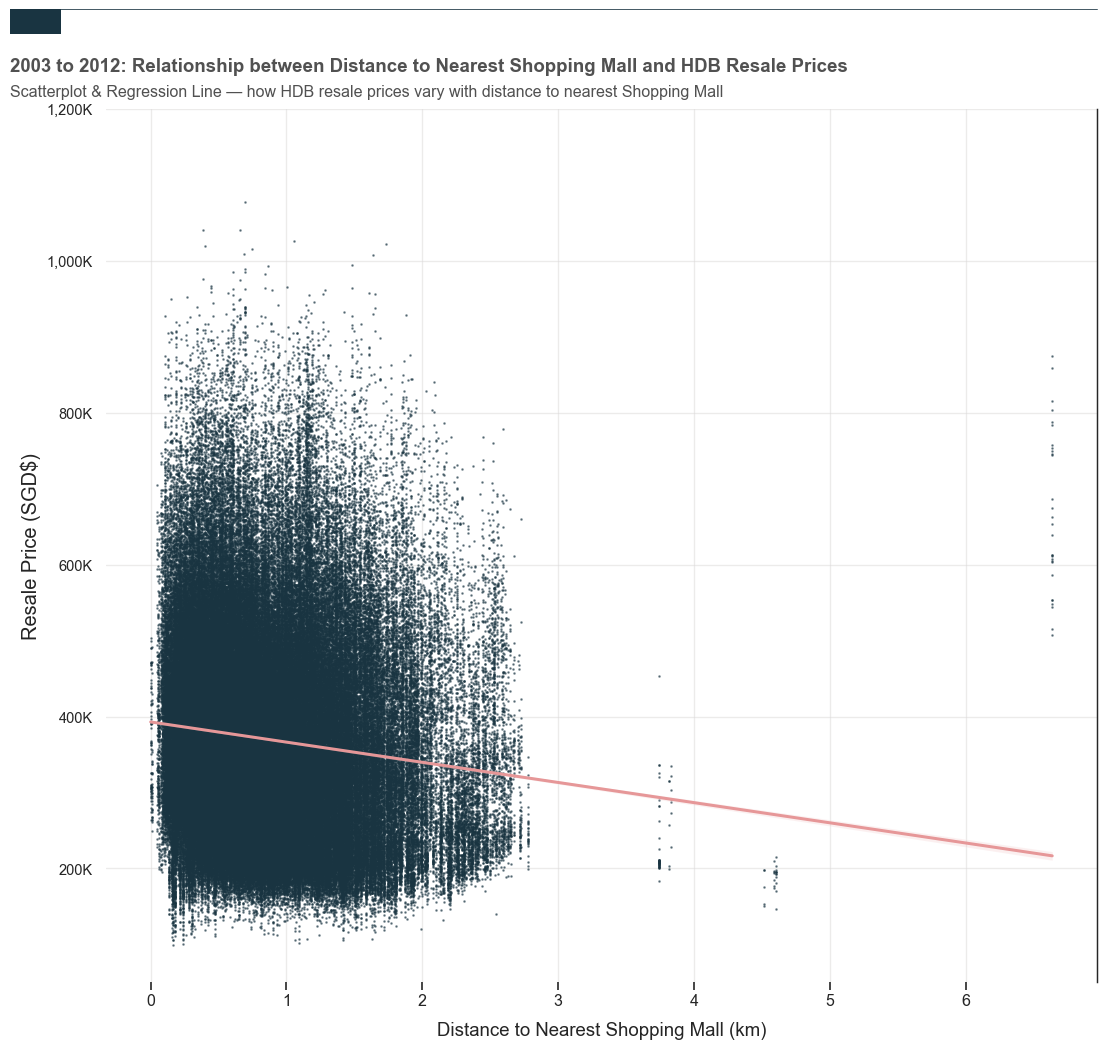

In [151]:
fig, ax = plt.subplots(figsize=(13.33, 13), dpi=96)

# Grid
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

p=sns.regplot(x='shortest_dist_mall', y='adjusted_price', data=hdb_price_df_03_12, color='#e69798', scatter_kws={"s": 1, 'alpha':0.5, 'color':'#193441'})


# Label x-axis and x ticks
ax.set_xlabel("Distance to Nearest Shopping Mall (km)", fontsize=14, labelpad=10) 
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)

# Reformat y-axis
p.set_ylabel('Resale Price (SGD$)', size=15)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)
p.set_ylim([50000,1200000])

# Remove the spines and Make right spine thicker
ax.spines[['top','left','bottom']].set_visible(False)
ax.spines['right'].set_linewidth(1.1)

ax.plot([0.05, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#193441', linewidth=.6)
ax.add_patch(plt.Rectangle((0.05,.98), 0.04, -0.02, facecolor='#193441', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.05, y=.93, s="2003 to 2012: Relationship between Distance to Nearest Shopping Mall and HDB Resale Prices", transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0.05, y=.91, s="Scatterplot & Regression Line — how HDB resale prices vary with distance to nearest Shopping Mall", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.9, wspace=None, hspace=None)

plt.show()

**Observations:**

There is a relatively strong and negative association between Distance to Nearest Shopping Mall and HDB Resale Prices. In other words, HDB Flats that are further away from their Nearest Shopping Mall are generally associated with a lower Resale Price. 

<font color='#ffab40'> 

**Comparing across both 10-year periods:**

Not much visible difference between the steepness of graphs showing the relationship between Distance to Nearest Shopping Mall and HDB Resale Prices across both decades.

However, there seems to be numerous HDB Flats that are more than 6km away from the Nearest Shopping Mall that have relatively high resale prices. Let's see which town(s) these HDBs belong to and what are the exact HDBs features. 
</font>


In [173]:
hdb_more_than_6km_from_nearest_mall = hdb_price_df_03_12[hdb_price_df_03_12['shortest_dist_mall'] > 6]
hdb_more_than_6km_from_nearest_mall

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,...,good_sch_list_within_1km,good_sch_score,good_sch_score_sap_gep,distance_to_cbd_km,matured,year,CPI,adjusted_price,flat_type_year,blocknum
80115,2011-11-01,MARINE PARADE,5 ROOM,27,MARINE CRES,19 TO 21,126.0,Standard,1975,63.0,...,[],0,0,23.277334,1,2011,93.842,815200.017050,5 ROOM - 2011,27
80116,2011-09-01,MARINE PARADE,5 ROOM,27,MARINE CRES,22 TO 24,126.0,Standard,1975,63.0,...,[],0,0,23.277334,1,2011,92.941,874748.496358,5 ROOM - 2011,27
80117,2011-08-01,MARINE PARADE,5 ROOM,27,MARINE CRES,04 TO 06,126.0,Standard,1975,63.0,...,[],0,0,23.277334,1,2011,93.115,757128.282232,5 ROOM - 2011,27
80118,2010-10-01,MARINE PARADE,5 ROOM,27,MARINE CRES,07 TO 09,126.0,Standard,1975,64.0,...,[],0,0,23.277334,1,2010,88.525,787348.206721,5 ROOM - 2010,27
80119,2010-08-01,MARINE PARADE,5 ROOM,27,MARINE CRES,13 TO 15,126.0,Standard,1975,64.0,...,[],0,0,23.277334,1,2010,88.081,749310.293934,5 ROOM - 2010,27
80120,2010-07-01,MARINE PARADE,5 ROOM,27,MARINE CRES,01 TO 03,126.0,Standard,1975,64.0,...,[],0,0,23.277334,1,2010,87.676,612482.321274,5 ROOM - 2010,27
80121,2010-07-01,MARINE PARADE,5 ROOM,27,MARINE CRES,22 TO 24,126.0,Standard,1975,64.0,...,[],0,0,23.277334,1,2010,87.676,858843.925362,5 ROOM - 2010,27
80122,2010-07-01,MARINE PARADE,5 ROOM,27,MARINE CRES,10 TO 12,126.0,Standard,1975,64.0,...,[],0,0,23.277334,1,2010,87.676,804096.902231,5 ROOM - 2010,27
80123,2010-04-01,MARINE PARADE,5 ROOM,27,MARINE CRES,01 TO 03,126.0,Standard,1975,64.0,...,[],0,0,23.277334,1,2010,86.901,605286.475415,5 ROOM - 2010,27
80124,2009-04-01,MARINE PARADE,5 ROOM,27,MARINE CRES,25 TO 27,126.0,Standard,1975,65.0,...,[],0,0,23.277334,1,2009,84.206,783792.128827,5 ROOM - 2009,27


In [179]:
towns_more_than_6km_list = hdb_more_than_6km_from_nearest_mall['town'].unique()
towns_more_than_6km = ''.join([str(town) for town in towns_more_than_6km_list])

street_name_more_than_6km_list = hdb_more_than_6km_from_nearest_mall['street_name'].unique()
street_name_more_than_6km = ''.join([str(street_name) for street_name in street_name_more_than_6km_list])

print('Town(s) and corresponding Street Name(s) of HDBs that are more than 6km away from the nearest Shopping Mall:\n Town:',towns_more_than_6km,'\nStreet Name:',street_name_more_than_6km )

Town(s) and corresponding Street Name(s) of HDBs that are more than 6km away from the nearest Shopping Mall:
 Town: MARINE PARADE 
Street Name: MARINE CRES


### 5.4 Good Schools Score

In [52]:
hdb_price_df['good_sch_score'].unique()

array([3, 4, 1, 0, 2])

/var/folders/dr/gs9wbbgs2zlcfyqybn5vvrw40000gn/T/ipykernel_8839/588363344.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylabels)


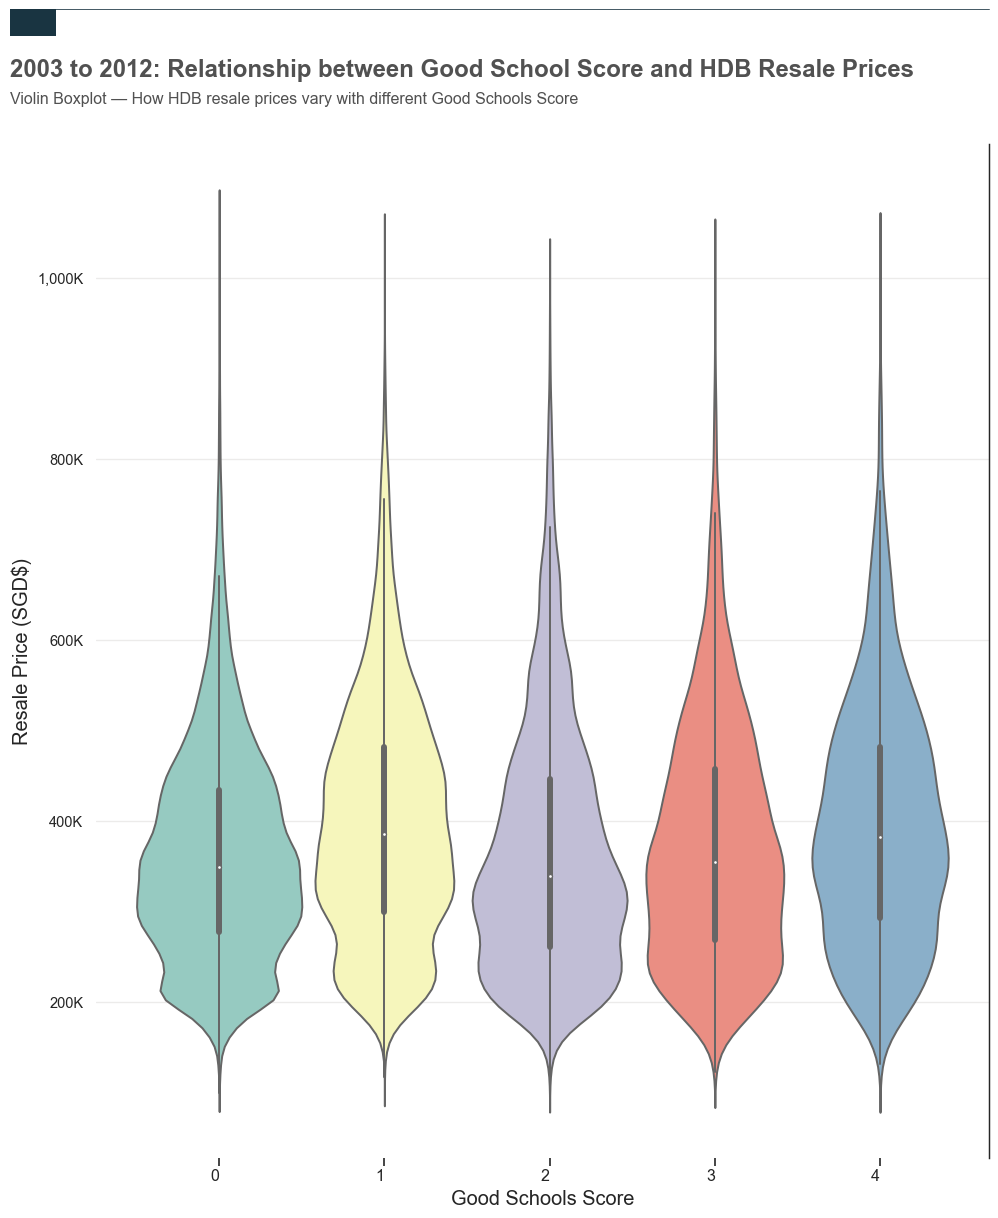

In [169]:
fig, ax = plt.subplots(figsize=(12, 14), dpi=96)

# Grid
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

p=sns.violinplot(x='good_sch_score',
                 y='adjusted_price', 
                 data=hdb_price_df_03_12, 
                 width=1, 
                 palette='Set3',
                 order=hdb_price_df_03_12.groupby('good_sch_score')['adjusted_price'].median().reset_index()['good_sch_score'].tolist())


p.set_xticklabels(p.get_xticklabels(), rotation=0, ha='right')
p.set_xlabel('Good Schools Score', size=15)
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)

ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)
p.set_ylabel('Resale Price (SGD$)', size=15)

# Remove the spines and make right spine thicker
ax.spines[['top','left','bottom']].set_visible(False)
ax.spines['right'].set_linewidth(1.1)

# Add in  line and rectangle on top
ax.plot([0.05, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#193441', linewidth=.6)
ax.add_patch(plt.Rectangle((0.05,.98), 0.04, -0.02, facecolor='#193441', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.05, y=.93, s="2003 to 2012: Relationship between Good School Score and HDB Resale Prices", transform=fig.transFigure, ha='left', fontsize=18, weight='bold', alpha=.8)
ax.text(x=0.05, y=.91, s="Violin Boxplot — How HDB resale prices vary with different Good Schools Score", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

plt.show()

**Observations:**

The scoring of good schools within 1 km of HDB Flat does not seem to be correlated with its resale price, as seen by the similar distribution of resale prices in the violin plot and corresponding median resale prices.

<font color='#ffab40'> 

**Comparing across both 10-year periods:**

Not much visible difference between the distributions of HDB resale prices for the different Good Schools Score.
</font>

### 5.5 Distance to Central Business District (CBD) 

/var/folders/dr/gs9wbbgs2zlcfyqybn5vvrw40000gn/T/ipykernel_8839/4227616796.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylabels)


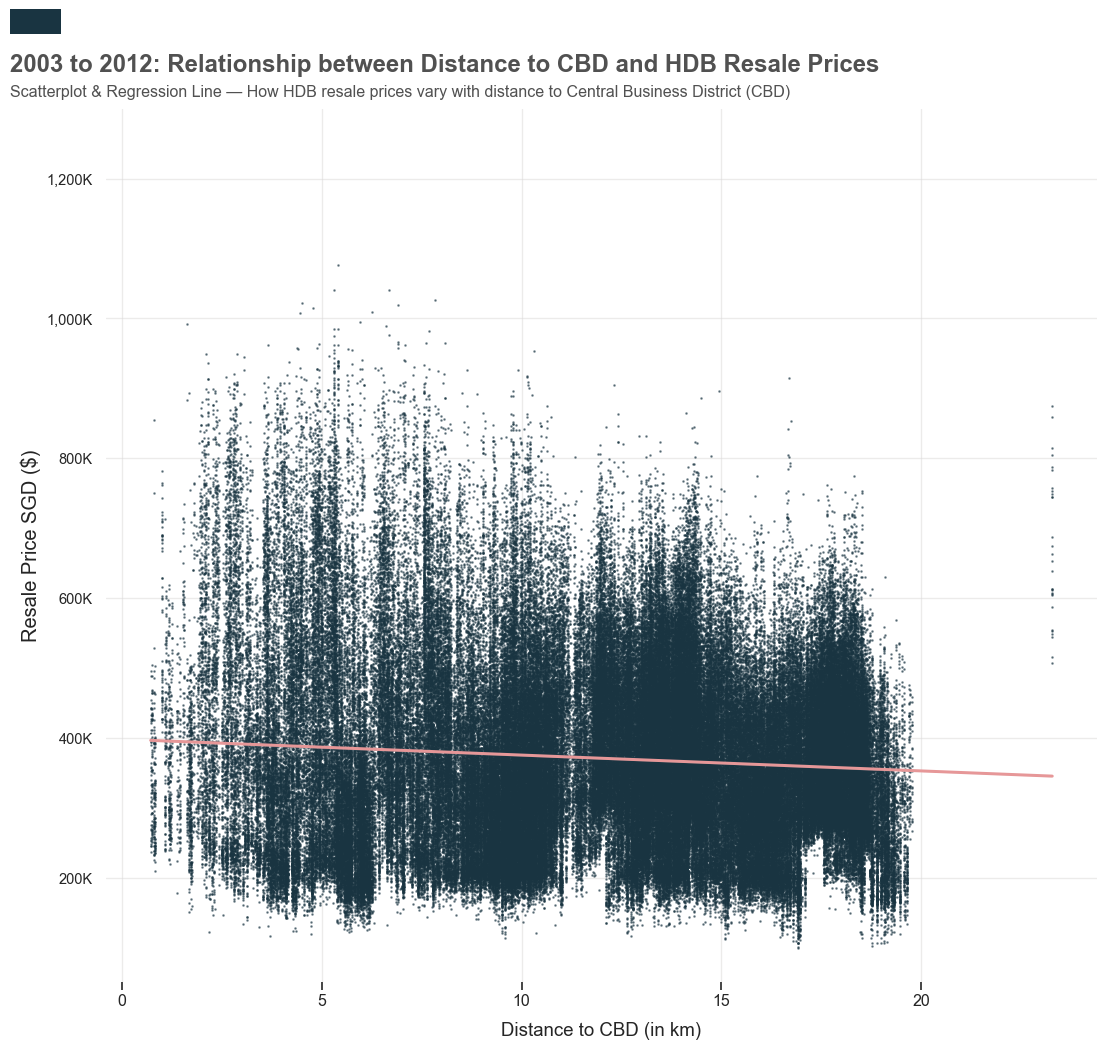

In [150]:
fig, ax = plt.subplots(figsize=(13.33, 13), dpi=96)

# Grid
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# 2004 to 2013
p=sns.regplot(x='distance_to_cbd_km', y='adjusted_price', data=hdb_price_df_03_12, color='#e69798', scatter_kws={"s": 1, 'alpha':0.5, 'color':'#193441'})

# Label x-axis and x ticks
ax.set_xlabel("Distance to CBD (in km)", fontsize=14, labelpad=10) 
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)

# Reformat y-axis
p.set_ylabel('Resale Price SGD ($)', size=15)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)
p.set_ylim([50000,1300000])

# Remove the spines
ax.spines[['top','left','bottom']].set_visible(False)
ax.spines['right'].set_linewidth(1.1)

# Add in  line and rectangle on top
ax.plot([0.05, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#193441', linewidth=.6)
ax.add_patch(plt.Rectangle((0.05,.98), 0.04, -0.02, facecolor='#193441', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.05, y=.93, s="2003 to 2012: Relationship between Distance to CBD and HDB Resale Prices", transform=fig.transFigure, ha='left', fontsize=18, weight='bold', alpha=.8)
ax.text(x=0.05, y=.91, s="Scatterplot & Regression Line — How HDB resale prices vary with distance to Central Business District (CBD)", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.9, wspace=None, hspace=None)

plt.show()

**Observations:**

Weak and negative correlation between Distance to CBD and HDB Resale Prices. The further the distance of HDB Flats from the Central Business District, there is a slight association that resale prices are lower and vice-versa.

<font color='#ffab40'>

**Comparing across both 10-year periods:**

In the recent decade (i.e. from 2013 to 2023), there is a stronger negative correlation between Distance to CBD and HDB Resale Prices compared to the earlier decade (i.e. 2003 to 2012); the steeper gradient in the recent decade implies that HDB Flats that are further away from CBD are associated with a more than proportionate dip in its prices. This suggests the likelihood of changing preferences in HDB owners' when it comes to the proximity of the HDB Flats and Central Business District.
</font>

### 5.6 Maturity of HDB Estate

In [57]:
hdb_price_df['matured'].unique()

array([1, 0])

/var/folders/dr/gs9wbbgs2zlcfyqybn5vvrw40000gn/T/ipykernel_8839/2501376037.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylabels)


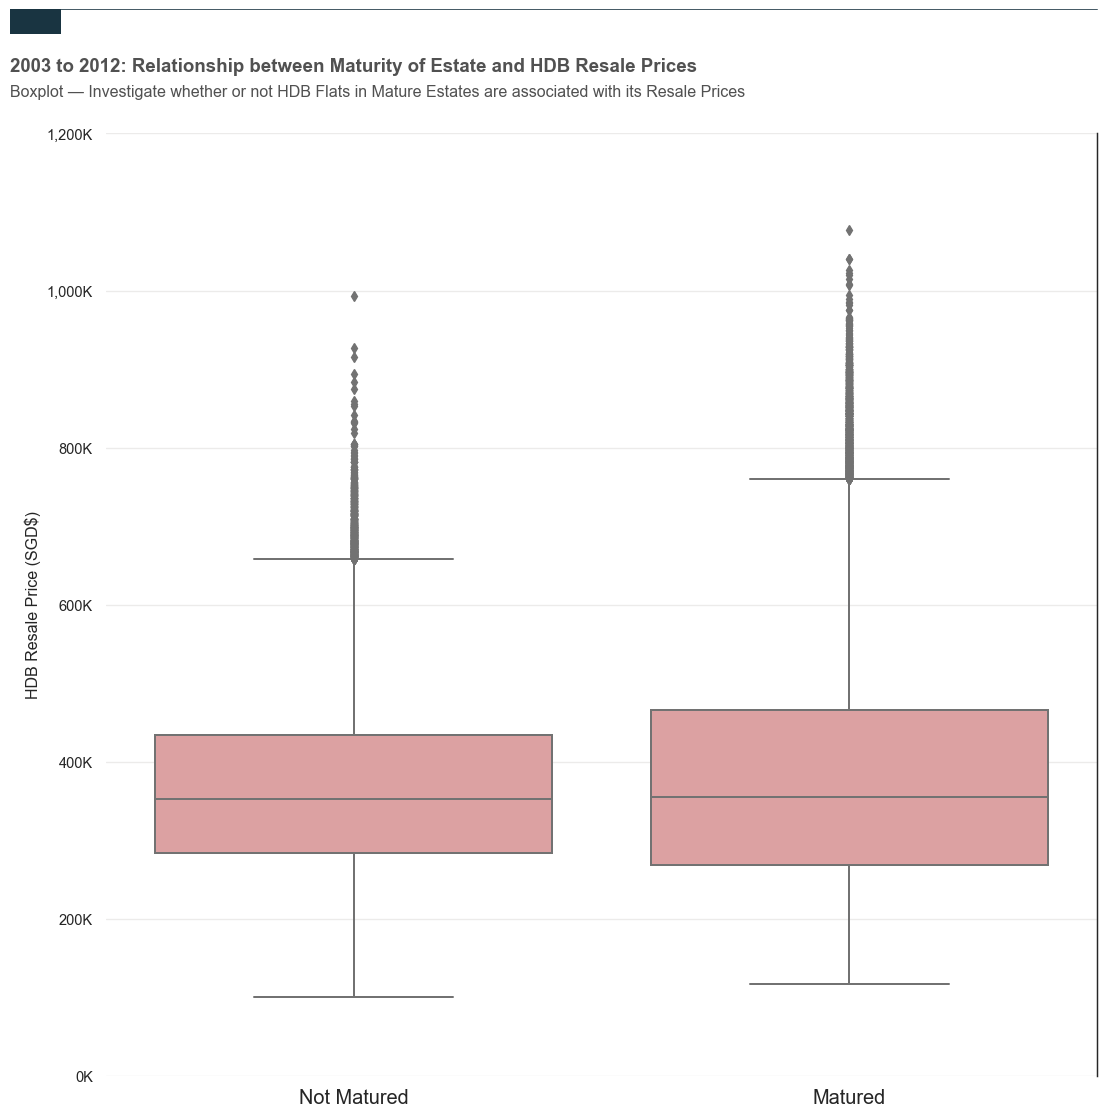

In [149]:
fig, ax = plt.subplots(figsize=(13.33, 13), dpi=96)

# Grid
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

p = sns.boxplot(x='matured', y='adjusted_price', data = hdb_price_df_03_12, palette=['#e69798', '#e69798'])
p.set_xticklabels(['Not Matured', 'Matured'], size = 15)
p.set_xlabel('', size=15)

ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)
p.set_ylabel('HDB Resale Price (SGD$)')
p.set_ylim([0,1200000])

# Remove the spines and make right thicker
ax.spines[['top','left','bottom']].set_visible(False)
ax.spines['right'].set_linewidth(1.1)

ax.plot([0.05, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#193441', linewidth=.6)
ax.add_patch(plt.Rectangle((0.05,.98), 0.04, -0.02, facecolor='#193441', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.05, y=.93, s="2003 to 2012: Relationship between Maturity of Estate and HDB Resale Prices", transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0.05, y=.91, s="Boxplot — Investigate whether or not HDB Flats in Mature Estates are associated with its Resale Prices", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

plt.show()

**Observations:**

Not much visible association between maturity of estates and resale prices. Median HDB Resale Prices are similar for both matured and non-matured estates.


<font color='#ffab40'>

**Comparing across both 10-year periods:**

In the recent decade (i.e. from 2013 to 2023), Matured Estates tend to fetch a slightly higher Median HDB Resale Prices compared to Non-Matured Estates while Median Prices are more or less the same regardless of the Estate's Maturity for the previous decade (i.e. 2003 to 2012).
</font>

